# Project in Introduction into Computational Statistics

Group Project

## Imports

In [1]:
library("nlstools")  # https://cran.r-project.org/web/packages/nlstools/nlstools.pdf
library("nortest")  # https://cran.r-project.org/web/packages/nortest/nortest.pdf
library("readxl")



'nlstools' has been loaded.


IMPORTANT NOTICE: Most nonlinear regression models and data set examples

related to predictive microbiolgy have been moved to the package 'nlsMicrobio'




## Preparation

In [2]:
type_extraction <- rep(c(NaN),times=21)  # my_data1 misses the columns

my_data1 <- read_excel("Project Data.xlsx", sheet="CORDILLERA")

my_data1 <- cbind(my_data1[1:2], type_extraction, my_data1[3:11])
my_data1
colnames(my_data1)


Sample,Date,type_extraction,Concentration,standard deviaton,population,Confirmed cases,Accumulated Incidence,Actual Cases,Actual Incidence Rate,Active Cases,Active Incidence Rate
<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
D7-1,2021-07-07,NaN,3.1873877,0.40085753,68093,5671,8328.3,133,195.3,133,195.3
D7-2,2021-07-14,NaN,1.6060688,0.45584588,68093,5760,8459.0,86,126.3,85,124.8
D7-3,2021-07-21,NaN,1.2207898,0.07848723,68093,5791,8504.5,30,44.1,28,41.1
D7-4,2021-07-28,NaN,6.9020746,2.25866796,68093,5838,8573.6,41,60.2,40,58.7
D8-1,2021-08-04,NaN,1.4725695,0.74888268,68093,5864,8611.8,35,51.4,35,51.4
D8-2,2021-08-11,NaN,3.0861268,1.29580728,68093,5886,8644.1,25,36.7,25,36.7
D8-3,2021-08-18,NaN,4.6922929,0.09749380,68093,5942,8726.3,39,57.3,39,57.3
D8-4,2021-08-25,NaN,3.9802258,0.33007837,68093,5963,8757.1,22,32.3,22,32.3
D9-1,2021-09-08,NaN,5.7595865,1.01241745,68093,6005,8818.8,6,8.8,6,8.8


[1] "Sample"                "Date"                  "type_extraction"      
 [4] "Concentration"         "standard deviaton"     "population"           
 [7] "Confirmed cases"       "Accumulated Incidence" "Actual Cases"         
[10] "Actual Incidence Rate" "Active Cases"          "Active Incidence Rate"

In [3]:
my_data0 <- read_excel("Project Data.xlsx", sheet="LOMA LARGA")
colnames(my_data0) <- colnames(my_data1)

my_data0


Sample,Date,type_extraction,Concentration,standard deviaton,population,Confirmed cases,Accumulated Incidence,Actual Cases,Actual Incidence Rate,Active Cases,Active Incidence Rate
<chr>,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A7-1,2021-07-06,TRI REAGENT,2.5921496,0.59042057,315732,32393,10259.7,460,145.7,455,144.1
A7-2,2021-07-13,TRI REAGENT,1.9575073,0.78171924,315732,32737,10368.6,304,96.3,301,95.3
A7-3,2021-07-20,TRI REAGENT,0.3884517,0.07433655,315732,32953,10437.0,187,59.2,182,57.6
A7-4,2021-07-27,TRI REAGENT,22.1391584,4.15976458,315732,33099,10483.3,151,47.8,150,47.5
A8-1,2021-08-03,TRI REAGENT,2.0340012,0.37283015,315732,33212,10519.0,122,38.6,121,38.3
A8-2,2021-08-10,TRI REAGENT,3.0447186,1.05653537,315732,33313,10551.0,93,29.5,93,29.5
A8-3,2021-08-17,TRI REAGENT,6.9062139,4.03155643,315732,33461,10597.9,96,30.4,95,30.1
A8-4,2021-08-31,TRI REAGENT,11.8130742,2.91722546,315732,33590,10638.8,48,15.2,47,14.9
A9-1,2021-09-07,TRI REAGENT,3.3120655,0.40428014,315732,33617,10647.3,27,8.6,27,8.6


spain column name order of my_data0: <br>
* id
* date
* Type of extraction # my_data1 doesn't have this info
* Concentration (copies/mL)
* Standard deviation
* Population
* Cumulative cases	# first file differs here from rest of the files but maybe it also means 'Confirmed Cases'
* Cumulative incidence rate	
* Current cases
* Current incidence rate
* Active cases 
* Active incidence rate

Other file sheets have same order of column names

In [4]:
my_data2 <- read_excel("Project Data.xlsx", sheet="2 NORTE")
colnames(my_data2) <- colnames(my_data1)

my_data2


Sample,Date,type_extraction,Concentration,standard deviaton,population,Confirmed cases,Accumulated Incidence,Actual Cases,Actual Incidence Rate,Active Cases,Active Incidence Rate
<chr>,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B7-1,2021-07-06,TRI REAGENT,10.1651621,3.61094131,667766,54779,24199.2,746,355.9,742,354.0
B7-2,2021-07-13,TRI REAGENT,0.7385654,0.07162128,667766,55396,24481.6,564,263.1,560,261.4
B7-3,2021-07-20,TRI REAGENT,0.1835831,0.01399180,667766,55782,24659.5,360,167.4,357,166.1
B7-4,2021-07-27,TRI REAGENT,6.2950296,2.51027118,667766,56109,24810.5,319,147.2,316,146.3
B8-1,2021-08-03,TRI REAGENT,1.0150129,1.30755914,667766,56308,24897.2,241,107.6,238,106.1
B8-2,2021-08-10,TRI REAGENT,12.3055751,1.44924630,667766,56528,24992.7,216,93.6,215,93.0
B8-3,2021-08-17,TRI REAGENT,0.7746382,0.11544027,667766,56814,25129.6,178,86.5,175,84.9
B8-4,2021-08-24,TRI REAGENT,0.4918733,0.08802329,667766,36690,24751.0,102,69.6,99,67.6
B9-1,2021-09-07,TRI REAGENT,0.0000000,0.00000000,667766,57111,25267.7,62,27.9,62,27.9


In [5]:
my_data3 <- read_excel("Project Data.xlsx", sheet="ALMENDRAL")
colnames(my_data3) <- colnames(my_data1)

my_data3


Sample,Date,type_extraction,Concentration,standard deviaton,population,Confirmed cases,Accumulated Incidence,Actual Cases,Actual Incidence Rate,Active Cases,Active Incidence Rate
<chr>,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C7-1,2021-07-07,TRI REAGENT,2.3318281,0.46192421,83494,6485,7767.0,136,162.9,135,161.7
C7-2,2021-07-14,TRI REAGENT,0.4985315,0.20689593,83494,6575,7874.8,81,97.0,81,97.0
C7-3,2021-07-21,TRI REAGENT,0.2326990,0.08499084,83494,6633,7944.3,54,64.7,54,64.7
C7-4,2021-07-28,TRI REAGENT,6.1194398,1.68332133,83494,6682,8003.0,54,64.7,52,62.3
C8-1,2021-08-04,TRI REAGENT,0.9166592,0.35615005,83494,6719,8047.3,42,50.3,41,49.1
C8-2,2021-08-11,TRI REAGENT,10.4234254,4.06640744,83494,6764,8101.2,43,51.5,43,51.5
C8-3,2021-08-31,TRI REAGENT,3.4727354,0.78376263,83494,6884,8244.9,27,32.3,27,32.3
C8-4,2021-08-25,TRI REAGENT,7.5141836,3.21542355,83494,6855,8210.2,38,45.5,38,45.5
C9-1,2021-09-08,TRI REAGENT,3.9431863,0.27643879,83494,6889,8250.9,5,6.0,5,6.0


We want to compare several datasets with each other. For normal we use the normalizing function $\frac{x_i - \mu}{\sigma}$. For example, when we have different devices (one for each dataset) for CT scans then we get out different coloured pictures which have all the same meaning but differ in colour. Here normalization is helpful. Here it is also possible that there are deviations in the process of testing. Therfore, normalize each dataset:

In [6]:
normalizer <- function(df_dollared){
    df_mean <- mean(df_dollared);
    df_sd <- sd(df_dollared);
    df_normal <- (df_dollared - df_mean)/df_sd
    return(as.data.frame(df_normal))
}


In [7]:
dfer_normalizer <- function(TIBBLE)
    {
    if(class(TIBBLE)!='data.frame')
        {df <-as.data.frame(TIBBLE)}
    else{df <- TIBBLE}


    df['Concentration'] = normalizer(df$Concentration)
    df['standard deviaton'] = normalizer(df$'standard deviaton')
    df['Confirmed cases'] = normalizer(df$'Confirmed cases')

    df['Actual Cases'] = normalizer(df$'Actual Cases')
    df['Active Cases'] = normalizer(df$'Active Cases')
    df['Accumulated Incidence'] = normalizer(df$'Accumulated Incidence')
    df['Actual Incidence Rate'] = normalizer(df$'Actual Incidence Rate')
    df['Active Incidence Rate'] = normalizer(df$'Active Incidence Rate')
    return(df)

    }


In [8]:
df0 <- dfer_normalizer(my_data0)
df1 <- dfer_normalizer(my_data1)
df2 <- dfer_normalizer(my_data2)
df3 <- dfer_normalizer(my_data3)

df01 <- merge(df0,df1, all=TRUE)
df23 <- merge(df2,df3, all=TRUE)
df_final = merge(df01,df23, all=TRUE)
df_final 


Warning message in if (class(TIBBLE) != "data.frame") {:
“Bedingung hat Länge > 1 und nur das erste Element wird benutzt”
Warning message in if (class(TIBBLE) != "data.frame") {:
“Bedingung hat Länge > 1 und nur das erste Element wird benutzt”
Warning message in if (class(TIBBLE) != "data.frame") {:
“Bedingung hat Länge > 1 und nur das erste Element wird benutzt”


Sample,Date,type_extraction,Concentration,standard deviaton,population,Confirmed cases,Accumulated Incidence,Actual Cases,Actual Incidence Rate,Active Cases,Active Incidence Rate
<chr>,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A10-1,2021-10-05,TRI REAGENT,-0.68470888,-0.73115229,315732,-0.01629661,-0.016227923,-0.76290876,-0.76225160,-0.76035959,-0.75983971
A10-2,2021-10-12,TRI REAGENT,-0.35502423,-0.04369919,315732,0.10279398,0.102728869,-0.55606991,-0.55587721,-0.55207193,-0.55198125
A10-3,2021-10-19,TRI REAGENT,-0.68470888,-0.73115229,315732,0.25219853,0.252108520,-0.41541950,-0.41481116,-0.41043632,-0.40990077
A10-4,2021-10-26,TRI REAGENT,-0.08906909,0.58998900,315732,0.48821442,0.488312955,0.09754085,0.09720633,0.10611708,0.10579871
A11-1,2021-11-03,TRI REAGENT,-0.68470888,-0.73115229,315732,0.71665181,0.716655304,0.23819126,0.23827237,0.24775269,0.24787918
A11-2,2021-11-09,TRI REAGENT,-0.68470888,-0.73115229,315732,1.15620434,1.156248508,1.47922435,1.47913109,1.49747866,1.49766111
A11-3,2021-11-16,TRI REAGENT,-0.36080316,-0.68476696,315732,1.58817837,1.588321455,1.42958303,1.42949674,1.44748962,1.44766983
A12-1,2021-12-07,TRI REAGENT,-0.39946790,-0.66429188,315732,2.61560532,2.615520193,0.32920036,0.32970407,0.33106776,0.33207502
A7-1,2021-07-06,TRI REAGENT,-0.19486959,-0.28396863,315732,-1.55906100,-1.558906095,2.46377727,2.46398106,2.44727039,2.44749537


In [9]:
# When you wonder about results of a normalized dataset, you can also try out the 
# unnormalized version: df_final_un
df0_ <-as.data.frame(my_data0)
df1_ <- as.data.frame(my_data1)
df2_ <- as.data.frame(my_data2)
df3_ <- as.data.frame(my_data3)
df01_ <- merge(df0_,df1_, all=TRUE)
df23_ <- merge(df2_,df3_, all=TRUE)
df_final_un = merge(df01_,df23_, all=TRUE)
df_final_un 


Sample,Date,type_extraction,Concentration,standard deviaton,population,Confirmed cases,Accumulated Incidence,Actual Cases,Actual Incidence Rate,Active Cases,Active Incidence Rate
<chr>,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A10-1,2021-10-05,TRI REAGENT,0.0000000,0.00000000,315732,33818,10711.0,70,22.2,70,22.2
A10-2,2021-10-12,TRI REAGENT,1.7446374,0.90765045,315732,33928,10745.8,95,30.1,95,30.1
A10-3,2021-10-19,TRI REAGENT,0.0000000,0.00000000,315732,34066,10789.5,112,35.5,112,35.5
A10-4,2021-10-26,TRI REAGENT,3.1520286,1.74431462,315732,34284,10858.6,174,55.1,174,55.1
A11-1,2021-11-03,TRI REAGENT,0.0000000,0.00000000,315732,34495,10925.4,191,60.5,191,60.5
A11-2,2021-11-09,TRI REAGENT,0.0000000,0.00000000,315732,34901,11054.0,341,108.0,341,108.0
A11-3,2021-11-16,TRI REAGENT,1.7140562,0.06124297,315732,35300,11180.4,335,106.1,335,106.1
A12-1,2021-12-07,TRI REAGENT,1.5094487,0.08827639,315732,36249,11480.9,202,64.0,201,63.7
A7-1,2021-07-06,TRI REAGENT,2.5921496,0.59042057,315732,32393,10259.7,460,145.7,455,144.1


**<p style="color:red;">Work with variable 'df_final' as normalized version. Raw data version: 'df_final_un'</p>**


## Sampling data

### Let's describe the problems of the raw datasets:
1. my_data1 is missing the feature 'type of extraction'. Solution: we can ignore this feature for all data sets because there is only one single option 'TRI REAGENT' in this feature contained. As long as there aren't any other options let's simply ignore this feature.
2. The datasets differ in their dates of data collection. There is often only a slight difference of one day data collection but it can happen that data is missing, e. g. there for normal there are four data collections per month but for my_data3 we have five, for my_data0 three and my_data2 ignores the november completely. <br>
conceivable solutions:
> when comparing all datasets together filter out all dates which aren't fitting together. However, with that approach valuable information may get lost, for instance information about december. <br>
Always look at the single datasets (or the filtered) and also at one big in which all datasets are merged. We can compare the results and look if there are any significant differences between them. <br>
> 
* The feature 'Concetration' sometimes has a value of 0. Is it some kind of missing information or the real value?
* Different dataset have different number of cases, absolute values not comparable. Solution: With help of the population you can convert the active cases to a relative feature such that they become comparable.
* To compare different datasets it is common that we normalize each dataset first. Here is the question if we should normalize after $\frac{x-\mu}{\sigma}$ or with help of the relatives, e. g. $\frac{ConfirmedCases}{population}$. Furthermore, features like the IncidenceRate should be already comparable because it is a rate on 100.000 people. However, it could be that some country chooses some other denominator or that a feature with same name is differently defined.

### Which sampling methods could fit?
Let's go through all sampling methods from the lecture and explain why they (don't) fit. 
1. Systematic sampling: e. g. choose every 4-rd. Firstly, order the data containing all datasets. When we would order it after data then circa only one datasets comes into our sample because one date appears often 4 times. When we simply stack the datasets on each other then only a few dates come into the sample. conclusion: problematic.
2. Stratified Sampling: my_data3 has almost the double size of my_data2. Shall there be the double of information of my_data3 compared to my_data2 in our sample? For a classifier maybe a good idea but here we work with a timeline. 
* Cluster sampling: Here we could make groups like the months then randomly select from each month a/some date(s). This could be very useful for bigger datasets but ours only contains 74 samples (not that large). 
* Random sampling: Problem here is that we could accidently draw a lot of feature 'Concentration' value 0 (the problem was described above) or that we ignore accidently whole months. 
* Convenienve Sampling: Seems like our data is already in that kind of form because there is data where we could get it. 
* Judgmental Sampling: With the we could answer questions like: 'concentration/actual cases/... during summer term'
* Snowball Sampling: makes more sense for data collection.
* Quota: With that we could execlude randomness and simply look at e. g. every third data collection of each month. However, there could be biased patterns, e. g. at that date a very bad doctor team makes the data collection of one country.

Conclusion: In our point of view the Cluster Sampling would have made the most sense if we had a bigger dataset. 

**We decided to normalize date and filter out dates which are far away from other dates.**

In [10]:
df_sorted <- df_final[
  with(df_final, order(Date)),
] # order our big dataframe by dates


In [13]:
dates<- df_sorted['Date']
dates[!duplicated(dates),]


 [1] "2021-07-06 UTC" "2021-07-07 UTC" "2021-07-13 UTC" "2021-07-14 UTC"
 [5] "2021-07-20 UTC" "2021-07-21 UTC" "2021-07-27 UTC" "2021-07-28 UTC"
 [9] "2021-08-03 UTC" "2021-08-04 UTC" "2021-08-10 UTC" "2021-08-11 UTC"
[13] "2021-08-17 UTC" "2021-08-18 UTC" "2021-08-24 UTC" "2021-08-25 UTC"
[17] "2021-08-31 UTC" "2021-09-07 UTC" "2021-09-08 UTC" "2021-09-14 UTC"
[21] "2021-09-15 UTC" "2021-09-21 UTC" "2021-09-22 UTC" "2021-09-28 UTC"
[25] "2021-09-29 UTC" "2021-10-05 UTC" "2021-10-06 UTC" "2021-10-12 UTC"
[29] "2021-10-13 UTC" "2021-10-19 UTC" "2021-10-20 UTC" "2021-10-26 UTC"
[33] "2021-10-27 UTC" "2021-11-03 UTC" "2021-11-04 UTC" "2021-11-08 UTC"
[37] "2021-11-09 UTC" "2021-11-10 UTC" "2021-11-16 UTC" "2021-11-17 UTC"
[41] "2021-11-24 UTC" "2021-12-07 UTC"

Checking these dates of our dataframe we see that only 2021-08-31 (in my_data0, my_data3), 2021-11-24 (in my_data1, my_data3) and 2021-12-07 (only in my_data0) are on the edge of their removal because they don't seem to have close dates. However, only the latter describes a lonely value which is also the only value for the whole dezember. Therefore, we could remove it.

In [14]:
df_sorted[74,] <- NA # the row with date 2021-12-07 gets NaN values
df_sorted <- na.omit(df_sorted) # remove rows in which only NaN values

df_sorted


,Sample,Date,type_extraction,Concentration,standard deviaton,population,Confirmed cases,Accumulated Incidence,Actual Cases,Actual Incidence Rate,Active Cases,Active Incidence Rate
,<chr>,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,A7-1,2021-07-06,TRI REAGENT,-0.19486959,-0.28396863,315732,-1.55906100,-1.558906095,2.46377727,2.46398106,2.44727039,2.44749537
22,B7-1,2021-07-06,TRI REAGENT,1.38798207,2.38506757,667766,-0.04438431,-1.953044981,2.42175106,2.46762738,2.42561873,2.47048097
42,C7-1,2021-07-07,TRI REAGENT,0.01631529,-0.18998241,83494,-2.00169811,-2.001832671,3.41228063,3.41264977,3.41250923,3.41288969
63,D7-1,2021-07-07,NaN,0.31961222,-0.20085858,68093,-1.88361815,-1.883676598,3.47367887,3.47365637,3.49071807,3.49106640
10,A7-2,2021-07-13,TRI REAGENT,-0.31479813,-0.13907931,315732,-1.18663227,-1.186653374,1.17310286,1.17348799,1.16421840,1.16350889
23,B7-2,2021-07-13,TRI REAGENT,-0.75816872,-0.75084367,667766,0.06621108,-1.254553141,1.52618010,1.50262181,1.52467463,1.50229886
43,C7-2,2021-07-14,TRI REAGENT,-0.57519875,-0.41249400,83494,-1.57566101,-1.575756251,1.50648560,1.50615614,1.52664887,1.52635868
64,D7-2,2021-07-14,NaN,-0.48725738,-0.12836735,68093,-1.41371928,-1.413788917,1.82297061,1.82333076,1.79987529,1.79974018
11,A7-3,2021-07-20,TRI REAGENT,-0.61130305,-0.67484990,315732,-0.95278166,-0.952841748,0.20509705,0.20431203,0.17276913,0.17157671


Now we have a dataframe sorted by dates with the lonely date 2021-12-07 removed.

## Task 1


###  a) CurrentIncidenceRate and ActualCases

Firstly, we have a glimpse in the correlations in general:

In [15]:
cor(df_final["Actual Cases"],df_final["Actual Incidence Rate"])


,Actual Incidence Rate
Actual Cases,0.9994105


However, we put above the different datasets into one big dataset even if they aren't really comparable. Lets look at the single datasets:

In [16]:
cor(df0["Actual Cases"],df0["Actual Incidence Rate"])


,Actual Incidence Rate
Actual Cases,0.9999998


In [17]:
cor(df1["Actual Cases"],df1["Actual Incidence Rate"])


,Actual Incidence Rate
Actual Cases,0.9999998


In [18]:
cor(df2["Actual Cases"],df2["Actual Incidence Rate"])


,Actual Incidence Rate
Actual Cases,0.9965623


In [19]:
cor(df3["Actual Cases"],df3["Actual Incidence Rate"])


,Actual Incidence Rate
Actual Cases,0.9999997


For all datasets we observe a very high correlation. Therefore, the varaibles seem to be linearly dependent.

###  b) ActiveIncidenceRate and ActiveCases

Same problem as above but with other features.

In [20]:
cor(df_final["Active Cases"],df_final["Active Incidence Rate"])


,Active Incidence Rate
Active Cases,0.9994258


For single datasets:

In [21]:
cor(df0["Active Cases"],df0["Active Incidence Rate"])


,Active Incidence Rate
Active Cases,0.9999998


In [22]:
cor(df1["Active Cases"],df1["Active Incidence Rate"])


,Active Incidence Rate
Active Cases,0.9999998


In [23]:
cor(df2["Active Cases"],df2["Active Incidence Rate"])


,Active Incidence Rate
Active Cases,0.9966514


In [24]:
cor(df3["Active Cases"],df3["Active Incidence Rate"])


,Active Incidence Rate
Active Cases,0.9999997


Also here the features "Active Cases" and "Active Incidence Rate" are highly correlated and therefore linearly dependend for every dataset.

## Task 2


[1] 7.071549e-05

[1] 69.99505

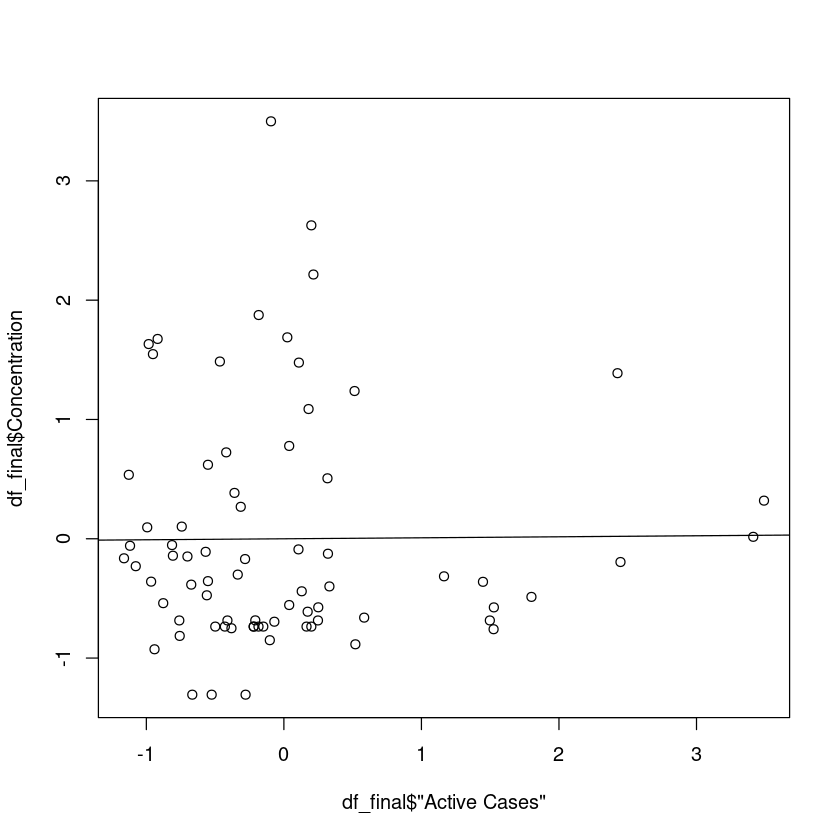

In [25]:
plot(df_final$'Active Cases', df_final$Concentration )

lin_model_2 <- lm(df_final$Concentration ~ df_final$'Active Cases')
abline(lin_model_2)
summary(lin_model_2)$r.squared

sum(summary(lin_model_2)$resid^2) # residual squared sum


As you can see, a linear regression line isn't able to imitate data which has to different directions. Try out a non linear regression:

[1] 67.86443

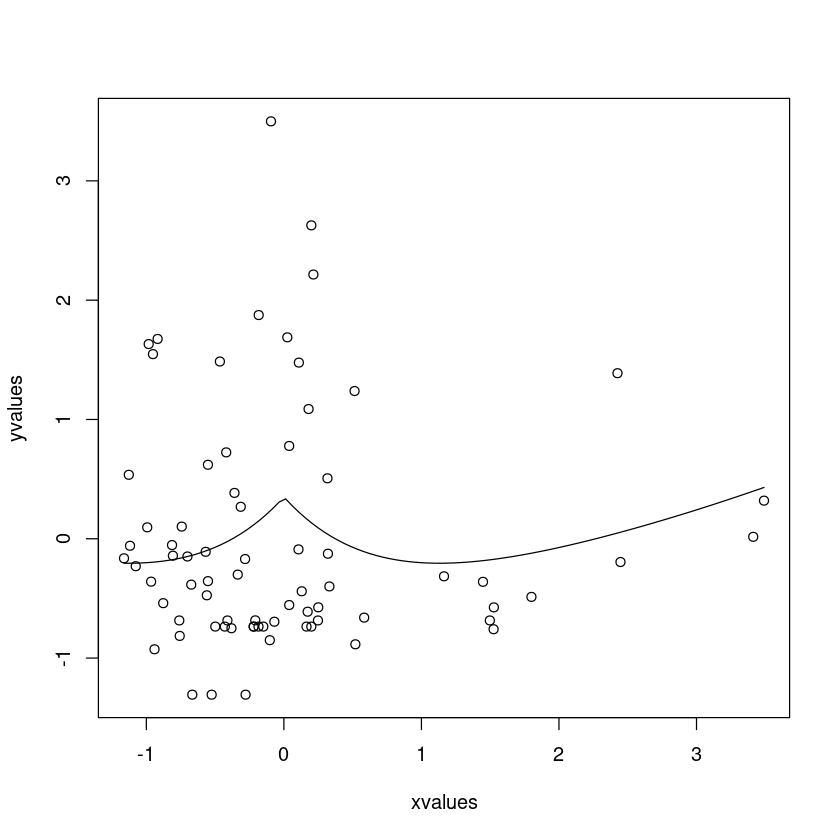

In [26]:
xvalues <- df_final$'Active Cases' 
yvalues <- df_final$'Concentration' 
plot(xvalues,yvalues)

nls_model_1 <- nls(yvalues ~ b1*(abs(xvalues)-5)^8 + b2 + b3*(-abs(xvalues)-7)^3,start = list(b1 = -0.04,b2=33,b3=+0.04))
# nls = nonlinear (weighted) least-squares estimates 

new.data <- data.frame(xvalues = seq(min(xvalues),max(xvalues),len = 100))

lines(new.data$xvalues,predict(nls_model_1,newdata = new.data))


# https://www.rdocumentation.org/packages/nlstools/versions/2.0-0/topics/nlsResiduals
# https://cran.r-project.org/web//packages/nlstools/nlstools.pdf
# With that nlsResiduals (model) we get
#std95 the Student value for alpha=0.05 (bilateral) and the degree of freedom of the model
#resi1 a matrix with fitted values vs. non-transformed residuals
#resi2 a matrix with fitted values vs. standardized residuals
#resi3 a matrix with fitted values vs. sqrt(abs(standardized residuals))
#resi4 a matrix with ith residuals vs. i+1th residuals
squared_resi_sum <- sum((nlsResiduals(nls_model_1)$resi1[,'Residuals'])^2)
squared_resi_sum 


What happens when we remove all samples for which we have a concentration of 0? These 0-values could be a sign of missing values.

In [27]:
df0_concentration_modified <- (subset(df0_, Concentration>0))
df1_concentration_modified <- (subset(df1_, Concentration>0))
df2_concentration_modified <- (subset(df2_, Concentration>0))
df3_concentration_modified <- (subset(df3_, Concentration>0))

df0_mc <- dfer_normalizer(df0_concentration_modified)
df1_mc <- dfer_normalizer(df1_concentration_modified)
df2_mc <- dfer_normalizer(df2_concentration_modified)
df3_mc <-  dfer_normalizer(df3_concentration_modified)


df01_mc <- merge(df0_mc,df1_mc, all=TRUE)
df23_mc <- merge(df2_mc,df3_mc, all=TRUE)
df_final_mc = merge(df01_mc,df23_mc, all=TRUE)


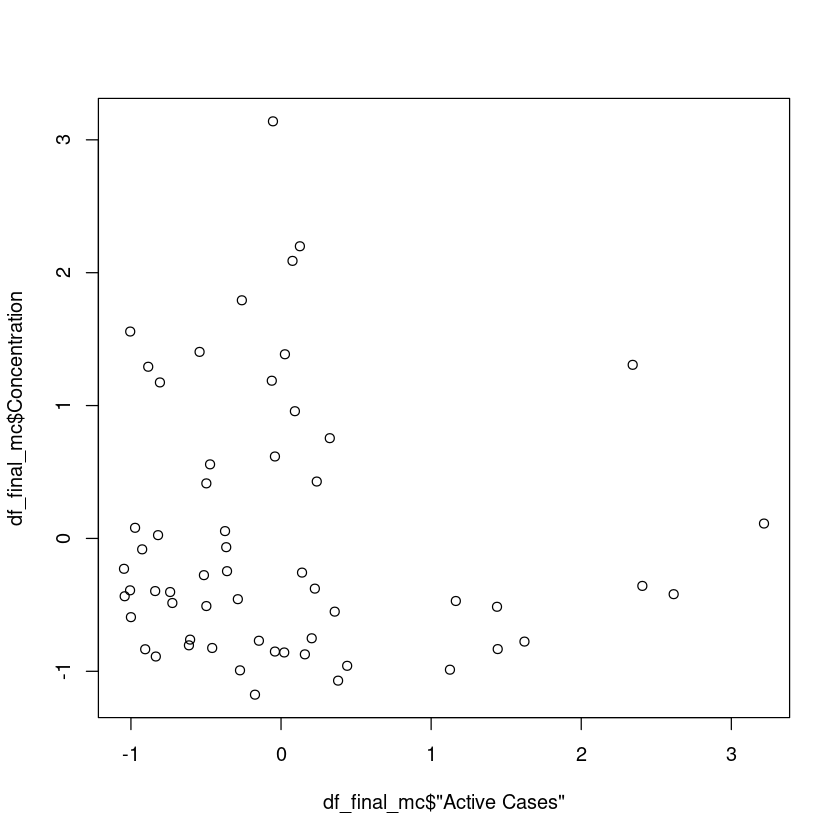

In [28]:
plot(df_final_mc$'Active Cases',df_final_mc$Concentration)


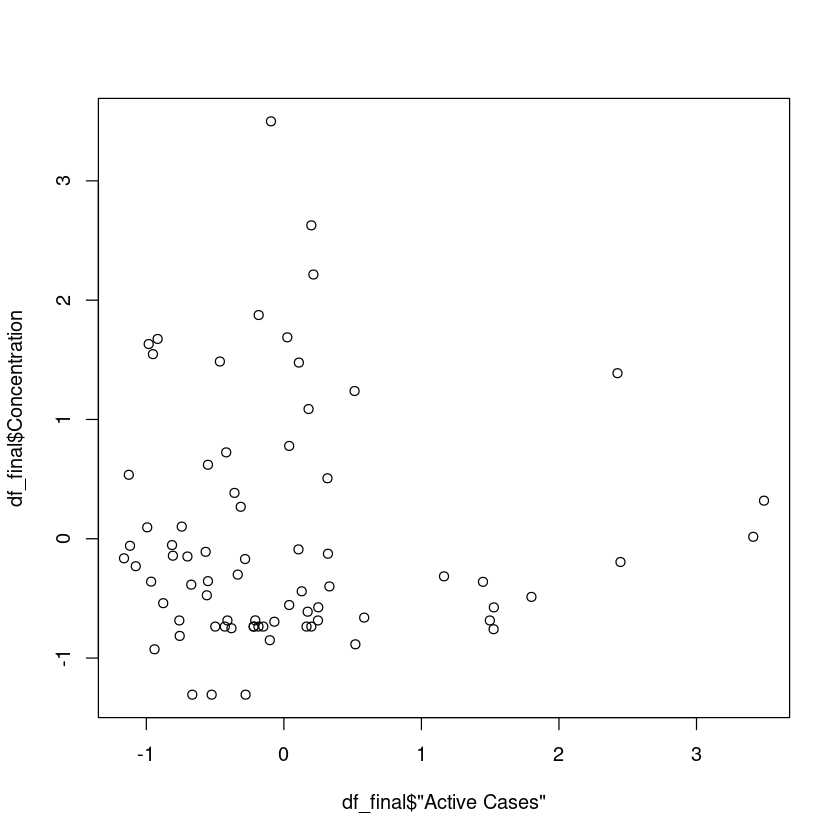

In [29]:
plot(df_final$'Active Cases',df_final$Concentration)


There is no big difference in the data distribution observable. Not helpful at all.

**When looking at the sum of squared residuals our first nls model 'model' (ca. 67) performs better than the linear regression model (ca. 69 for normalized data). However, these difference is only small. Therefore, we will go on with work on 'model'. These values are comparable because we worked with the same data.**

### Would quality of linear regression increase when we would use independent varaible 'Active Incidence Rate' instead?

[1] 2.986949e-05

[1] 69.99791

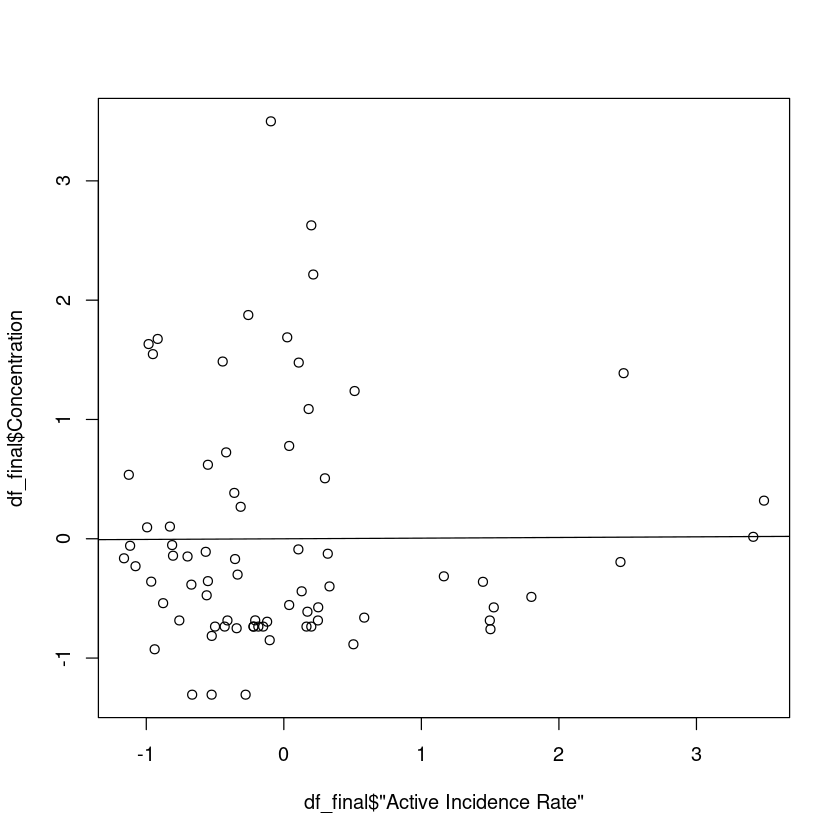

In [30]:
plot(df_final$'Active Incidence Rate', df_final$Concentration )

lin_model_2b <- lm(df_final$Concentration ~ df_final$'Active Incidence Rate')
abline(lin_model_2b)
summary(lin_model_2b)$r.squared

sum(summary(lin_model_2b)$resid^2) # residual squared sum


Let's also look at the unnormalized data:

In [32]:
lin_model_2aa <- lm(df_final_un$Concentration ~ df_final_un$'Active Cases')
summary(lin_model_2aa)$r.squared

sum(summary(lin_model_2aa)$resid^2) # residual squared sum


[1] 0.01689033

[1] 1024.014

[1] 0.009438963

[1] 1031.775

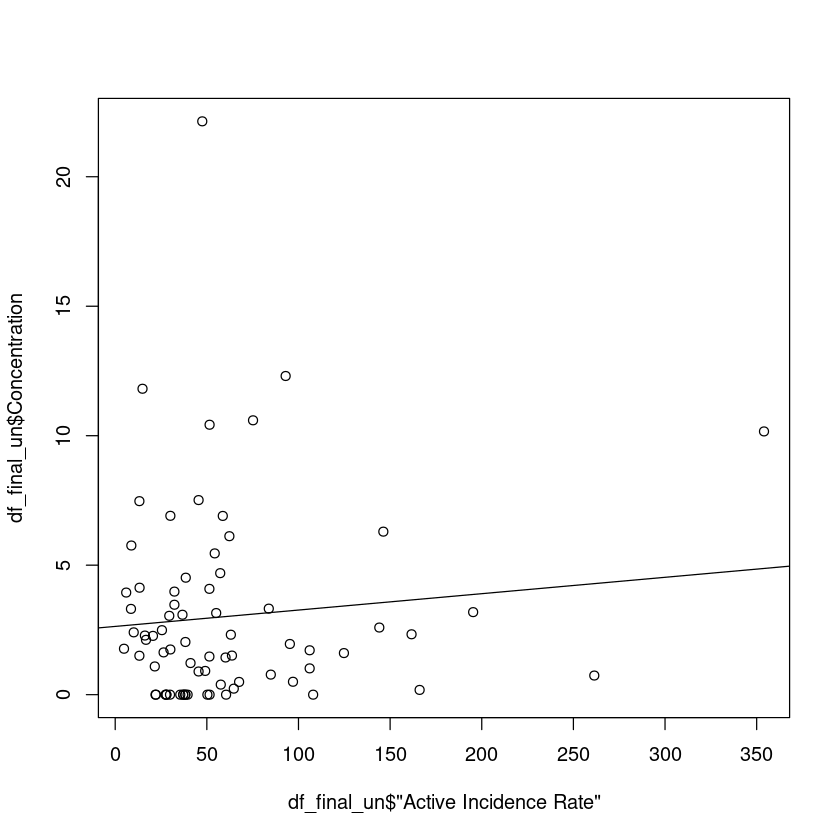

In [33]:
plot(df_final_un$'Active Incidence Rate', df_final_un$Concentration )

lin_model_2bb <- lm(df_final_un$Concentration ~ df_final_un$'Active Incidence Rate')
abline(lin_model_2bb)
summary(lin_model_2bb)$r.squared

sum(summary(lin_model_2bb)$resid^2) # residual squared sum


As you can see in in the sum of squared residual and also in the data distribution of (un)normalized data: Answer is NO.

### Are residuals normally distributed?

Let's have a look at our better performing nls model 'model'. 

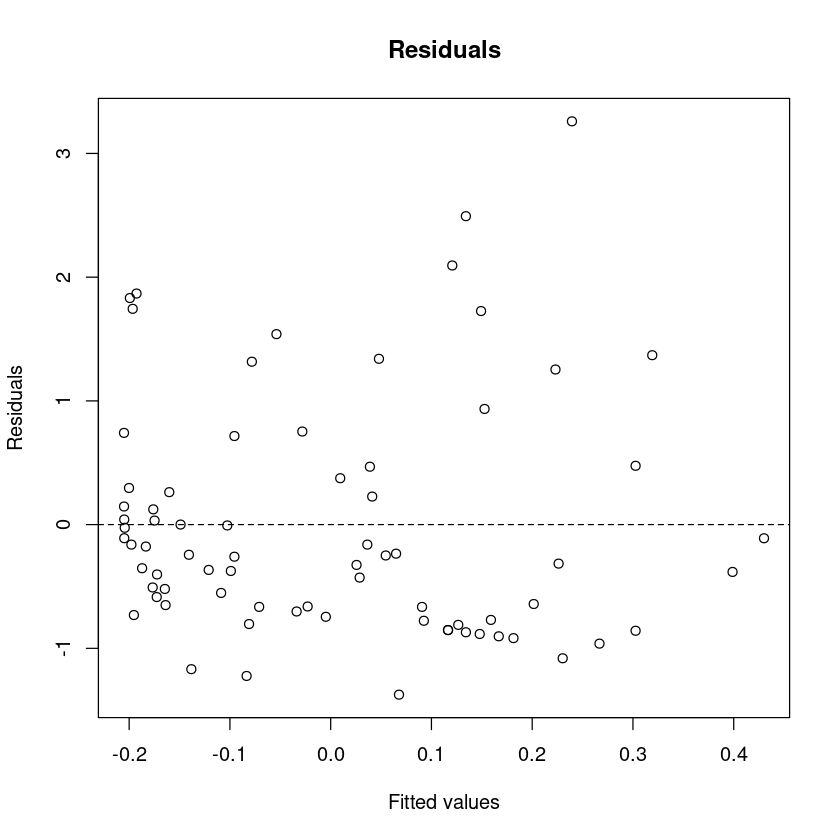

In [34]:
model_resi <- nlsResiduals(nls_model_1)
plot(model_resi, which = 1) # 'which' gives us one of the four possible diagrams. 'which=0' gives us all four
# diagramms


The residuals don't seem to be normally distributed. Here we can observe a skewed distribution.

In [35]:
library(nortest)
model_resi_values <- nlsResiduals(nls_model_1)$resi1[,'Residuals']

# 1. Anderson_Darling test for normality:
p1 <- ad.test(model_resi_values)$p.value
# 2. Cramer-von Mises test for normality:
p2 <- cvm.test(model_resi_values)$p.value
# 3. Lilliefors (Kolmogorov-Smirnov) test for normality:
p3 <- lillie.test(model_resi_values)$p.value
# 4. Pearson chi-square test for normality:
p4 <- pearson.test(model_resi_values, n.classes=length(model_resi_values))$p.value
# 5. Shapiro_Francia test for normality:
p5 <- sf.test(model_resi_values)$p.value
p_average <- (p1+p2+p3+p4+p5)/5

p1
p2
p3
p4
p5
p_average


[1] 2.287213e-07

[1] 1.915983e-06

[1] 8.503289e-05

[1] 0.01326529

[1] 2.470379e-05

[1] 0.002675435

The tests refer to the composite hypothesis of normality of the inputted x (here residuals). All p < significance_level = 0.05 which means that we can reject the nullhypothesis that the residuals come from a normal distribution. We can integrate that knowledge when creating a second better fitting model.<br>
We can also look at the Komogorov-Smirnov test with which we can look if there is a difference between our residuals and a normal distribution.

In [36]:
residuals_removed_duplicates <- unique(model_resi_values) # remove the duplicates, else the 
# test won't work
k1<-ks.test(residuals_removed_duplicates,"pnorm") # test if samples come from normal distribution
k1



	One-sample Kolmogorov-Smirnov test

data:  residuals_removed_duplicates
D = 0.15481, p-value = 0.05405
alternative hypothesis: two-sided


p = 0.05405 > 0.05. When this happens we can NOT reject the null-hypothesis which says that there is NO difference between a subsample set and a normal distribution. <br>
The omnibus tests reject the nullhypothesis but the Komogorov-Smirnov p-values just exceeds the limit alpha value of 0.05. So we can't say for sure but all in all there seems to be the tendency of rejecting the null-hypthesis, such that our residuals don't seem to be normally distributed.

### Are there outliers?
Outlier: in y-direction far away from other points and may have large regression residuals. <br>
Method of finding them: Boxplot! (Also z-scores)

[1] 3.498935 2.627073 2.215035

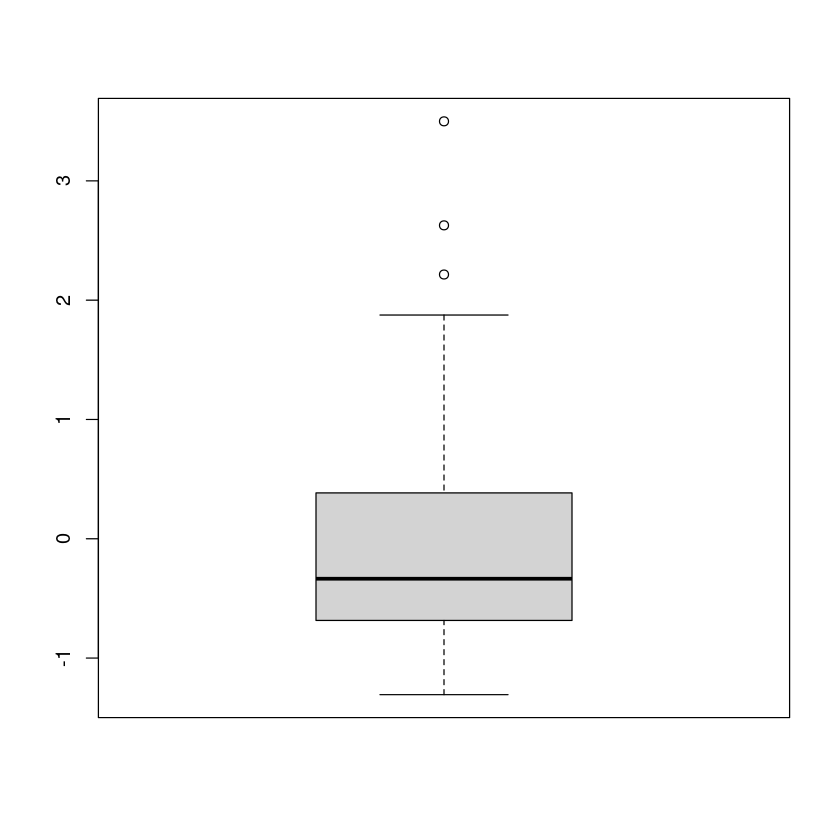

In [37]:
outliers <- boxplot(df_final$Concentration)$out # because we look at the y-axis
outliers


As calculation:

In [38]:
summary(df_final$Concentration)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.3068 -0.6847 -0.3349  0.0000  0.3682  3.4989 

In [39]:
iqr <- IQR(df_final$Concentration)

border_outlier_above <- 0.3682 + 1.5 *iqr # 3.Quartile = 0.3682
border_outlier_below <- -0.6847 - 1.5 *iqr # 1.Quartile = -0.6847
border_outlier_above
border_outlier_below


[1] 1.947601

[1] -2.264101

We observe 3 outliers in the boxplot.

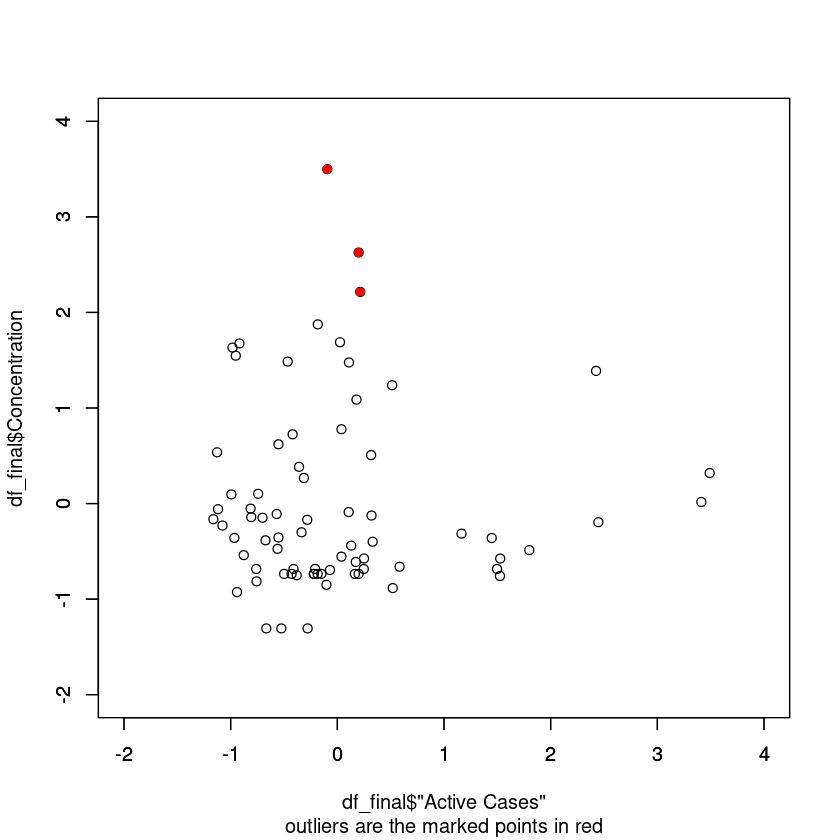

In [40]:
plot(df_final$'Active Cases', df_final$Concentration,xlim = c(-2, 4), ylim=c(-2,4))

# Find out the coordinates of the outliers which we want to mark in the upcoming plot:
outlier_values <- c(3.49893460134516,2.62707312672166,2.21503513652791)
indices_of_outliers <- which(round(df_final$Concentration, 14 ) >= 2.21503513652791)
x_values_of_outliers <- df_final$'Active Cases'[indices_of_outliers]

# Add to our plot a second plot marking the outliers in red:
par(new=TRUE) # makes it possible to merge two plots
plot(x_values_of_outliers,outlier_values, col='red', xlab='', ylab='',xlim = c(-2, 4), ylim=c(-2,4), pch=16,
    sub='outliers are the marked points in red')
# pch gives us the layout of samples. 'pch=16' leads to filled out points.


### Does adding of secondary variables lead to better regression?
Our answer: No, with exception of adding the standard deviation

Possible variables:


In [41]:
colnames(my_data0)


[1] "Sample"                "Date"                  "type_extraction"      
 [4] "Concentration"         "standard deviaton"     "population"           
 [7] "Confirmed cases"       "Accumulated Incidence" "Actual Cases"         
[10] "Actual Incidence Rate" "Active Cases"          "Active Incidence Rate"

Execlude primary variables Concentration, ActualCases, ActiveCases.

So far we have an circa error of 67 for our model.

In [42]:
xvalues1 <- df_final$'Active Cases' 
xvalues2 <- df_final$'Confirmed cases'


yvalues <- df_final$'Concentration'


model <- nls(yvalues ~ b1*(abs(xvalues1)-5)^8 + b2 + b3*(-abs(xvalues1)-7)^3 + (-abs(xvalues2-0.2)^2 +1.2),start = list(b1 = -0.04,b2=33,b3=+0.04))
new.data <- data.frame(xvalues = seq(min(xvalues1,xvalues2),max(xvalues1,xvalues2),len = length(xvalues)))


squared_resi_sum <- sum((nlsResiduals(model)$resi1[,'Residuals'])^2)
squared_resi_sum 


[1] 230.738

Try it with lm model:<br>So far achieved with that:

In [43]:
lin_model_2 <- lm(df_final$Concentration ~ df_final$'Active Cases')
summary(lin_model_2)$r.squared
sum(summary(lin_model_2)$resid^2) # residual squared sum


[1] 7.071549e-05

[1] 69.99505

In [44]:
lin_model_2 <- lm(df_final$Concentration ~ df_final$'Active Cases' +
                 df_final$'standard deviaton' + df_final$'Active Incidence Rate' + df_final$'Confirmed cases'
                 + df_final$'Accumulated Incidence' + df_final$'Actual Incidence Rate'
                 )
summary(lin_model_2)$r.squared

sum(summary(lin_model_2)$resid^2) # residual squared sum


[1] 0.5577217

[1] 30.95948

In [45]:
lin_model_2_std <- lm(df_final$Concentration ~
                 df_final$'standard deviaton' 
                 )

summary(lin_model_2_std)$r.squared

sum(summary(lin_model_2_std)$resid^2) # residual squared sum


[1] 0.5437143

[1] 31.94

In [46]:

lin_model_added <- lm(df_final$Concentration ~ df_final$'Active Cases' +
                  df_final$'Active Incidence Rate' + df_final$'Confirmed cases'
                 + df_final$'Accumulated Incidence' + df_final$'Actual Incidence Rate'
                 )
summary(lin_model_added)$r.squared

sum(summary(lin_model_added)$resid^2) # residual squared sum


[1] 0.09859407

[1] 63.09842

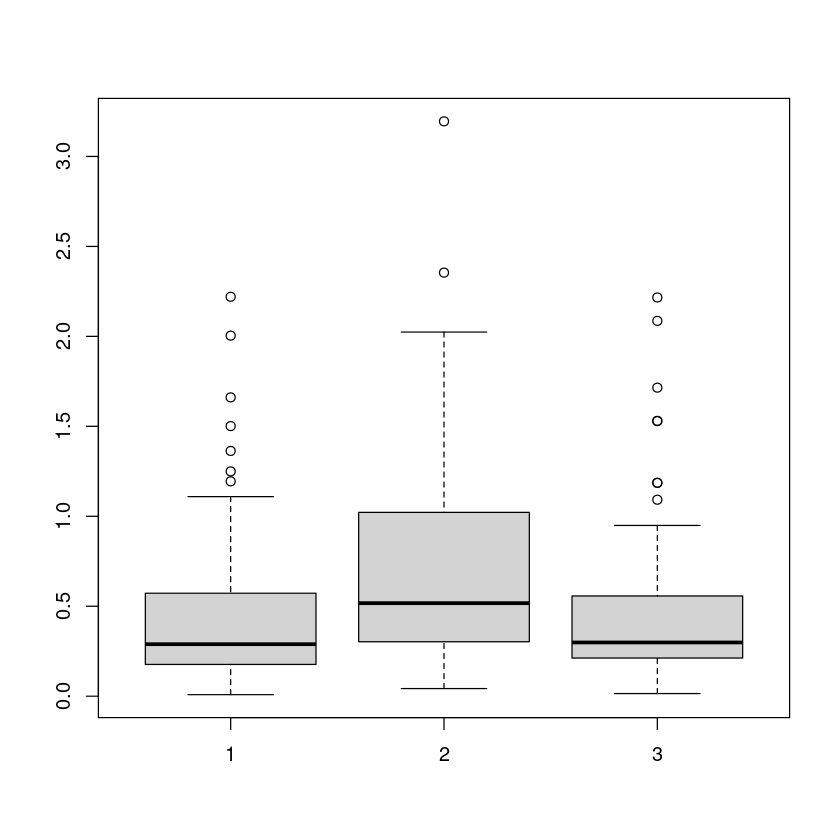

In [47]:
both_model_resi <- cbind(abs(lin_model_2$resi), abs(lin_model_added$resi), abs(lin_model_2_std$resi))
boxplot(both_model_resi)


When we ignore the 'standard deviation' because it's directly related to the 'Concentration' then the linear regression model with several independent variables explains cica 9.8 % of the variance of 'Concentration'. That's much more better than before, only using 'Active Cases' as independent variable (circa 0.007 %). Looking at the distribution of absolute residual values in the boxplot, we can observe, that the median of the two outer boxes are beyond the box in the middle. That gives us a hint that the boxes differ.

Warning message in b1 * (abs(xvalues) - 5)^8 + b2 + b3 * (-abs(xvalues) - 7)^3 - :
“longer object length is not a multiple of shorter object length”
Warning message in b1 * (abs(xvalues) - 5)^8 + b2 + b3 * (-abs(xvalues) - 7)^3 - :
“longer object length is not a multiple of shorter object length”


[1] 63.43652

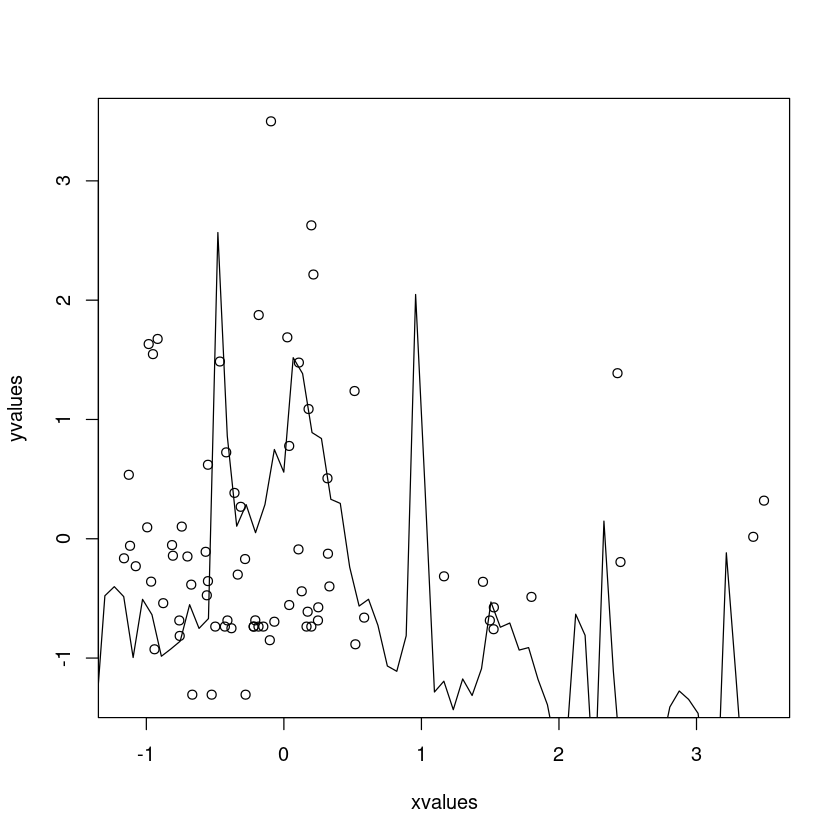

In [48]:
# nls = nonlinear (weighted) least-squares estimates 

xvalues <- df_final$'Active Cases' 
xvalues2 <- df_final$'Confirmed cases'
xvalues3 <- df_final$'Actual Incidence Rate'
yvalues <- df_final$'Concentration' 

plot(xvalues,yvalues)

nls_model_added_vari <- nls(yvalues ~ b1*(abs(xvalues)-5)^8 + b2 + b3*(-abs(xvalues)-7)^3 -abs(xvalues2)*0.2 + abs(xvalues3) ,start = list(b1 = -0.04,b2=33,b3=+0.04))
new.data <- data.frame(xvalues = seq(min(xvalues, xvalues2,xvalues3),max(xvalues,xvalues2,xvalues3),len = 100))

lines(new.data$xvalues,predict(nls_model_added_vari,newdata = new.data))


# https://www.rdocumentation.org/packages/nlstools/versions/2.0-0/topics/nlsResiduals
# https://cran.r-project.org/web//packages/nlstools/nlstools.pdf
# With that nlsResiduals (model) we get
#std95 the Student value for alpha=0.05 (bilateral) and the degree of freedom of the model
#resi1 a matrix with fitted values vs. non-transformed residuals
#resi2 a matrix with fitted values vs. standardized residuals
#resi3 a matrix with fitted values vs. sqrt(abs(standardized residuals))
#resi4 a matrix with ith residuals vs. i+1th residuals
squared_resi_sum <- sum((nlsResiduals(nls_model_added_vari)$resi1[,'Residuals'])^2)
squared_resi_sum 


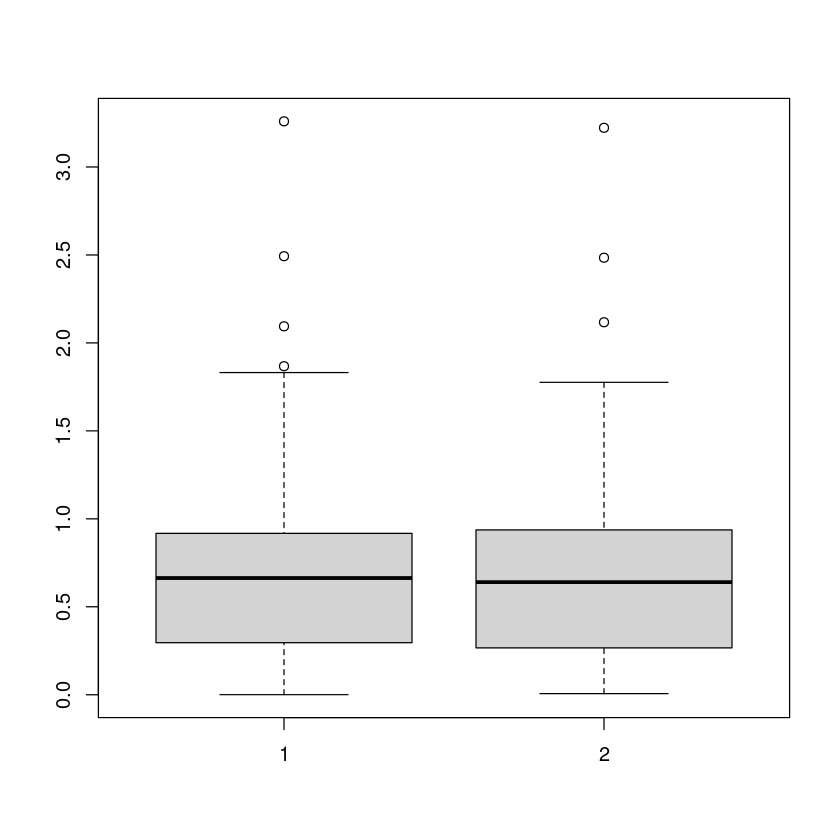

In [49]:
both_nls_models_resi <- cbind(abs(model_resi_values),abs(nlsResiduals(nls_model_added_vari)$resi1[,'Residuals']))
boxplot(both_nls_models_resi)


Before we had for our nls model the R^2 sum of circa 67. With adding secondary variables (standard deviation execluded) we get ca. 63. In the boxplot we see the distribution of residuals of the two models. No median lays above/below the other box. Therefore, we can't observe a significant difference by adding variables for the nls model.

## Task 3

### Is linear regression plausible?

In [50]:
x <- df_final$"Concentration"
y <- df_final$"Active Cases" 


Coefficient of determination: 0.00007
Residual sum of squares: 69.99505

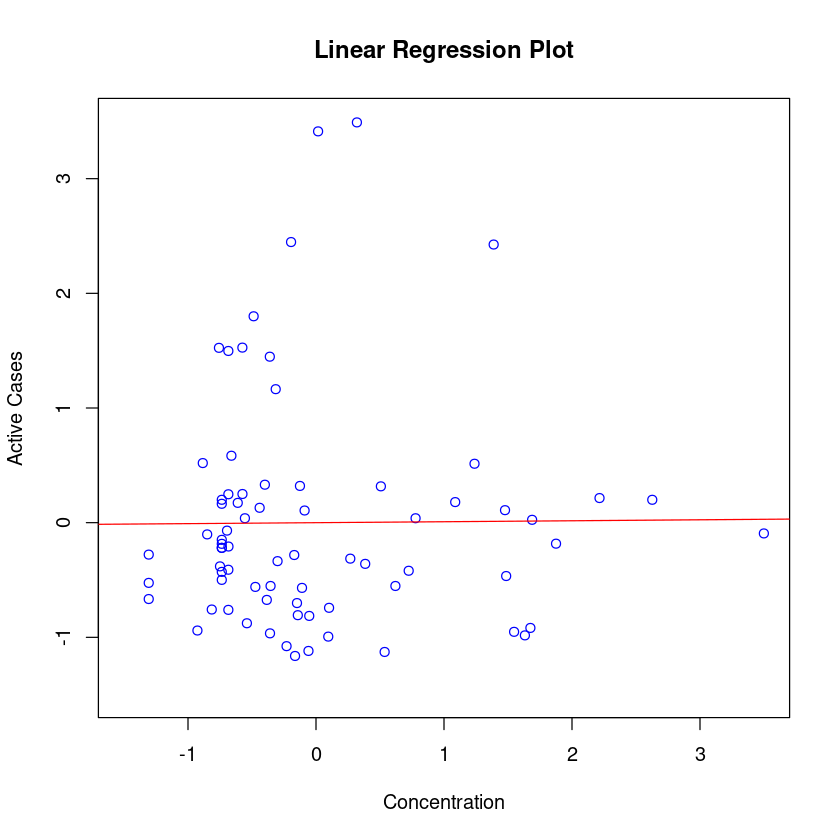

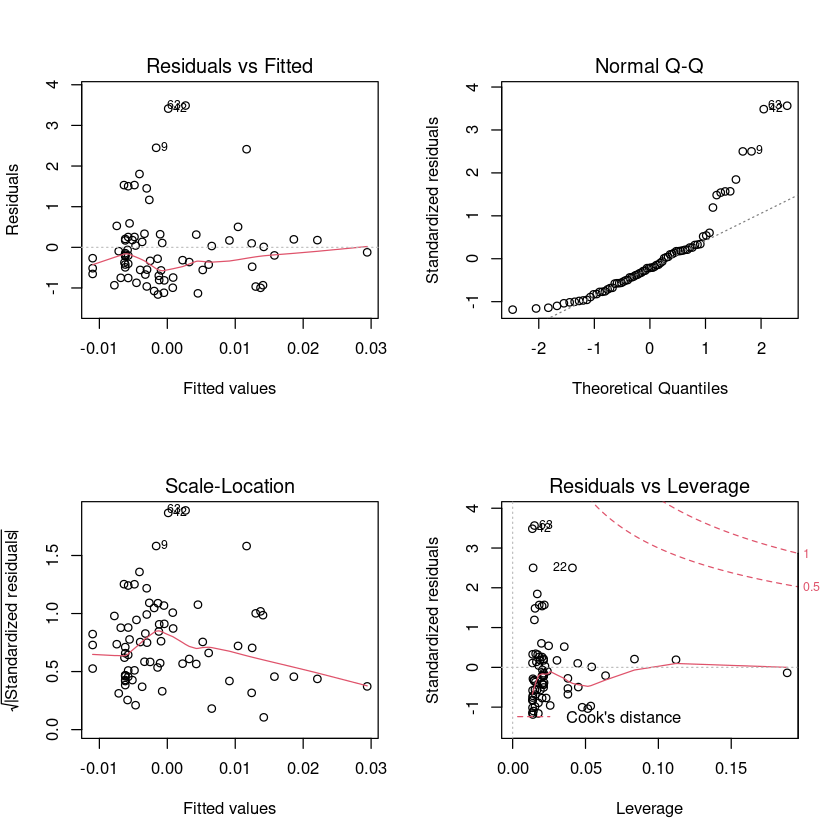

In [51]:
lm_task3 <- lm(y ~ x)

lm_task3_res <- lm_task3$residuals
cat(sprintf("Coefficient of determination: %.5f\n", summary(lm_task3)$r.squared))
cat(sprintf("Residual sum of squares: %.5f", sum(lm_task3_res ^ 2.0)))

plot(x, y, main = "Linear Regression Plot",
     xlab = "Concentration", ylab = "Active Cases",
     xlim = c(-1.5, 3.5), ylim = c(-1.5, 3.5), col = "blue", pch = 1)
abline(lm_task3, col = "red")

par(mfrow = c(2, 2))
plot(lm_task3)


Pseudo-coefficient of determination: 0.02368
Residual sum of squares: 68.34270

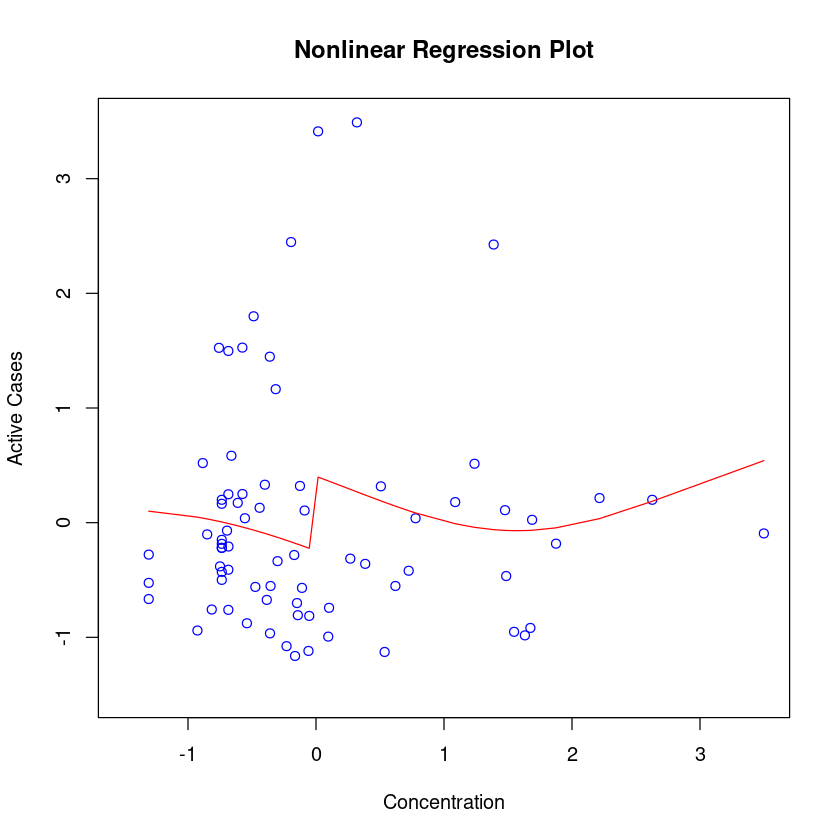

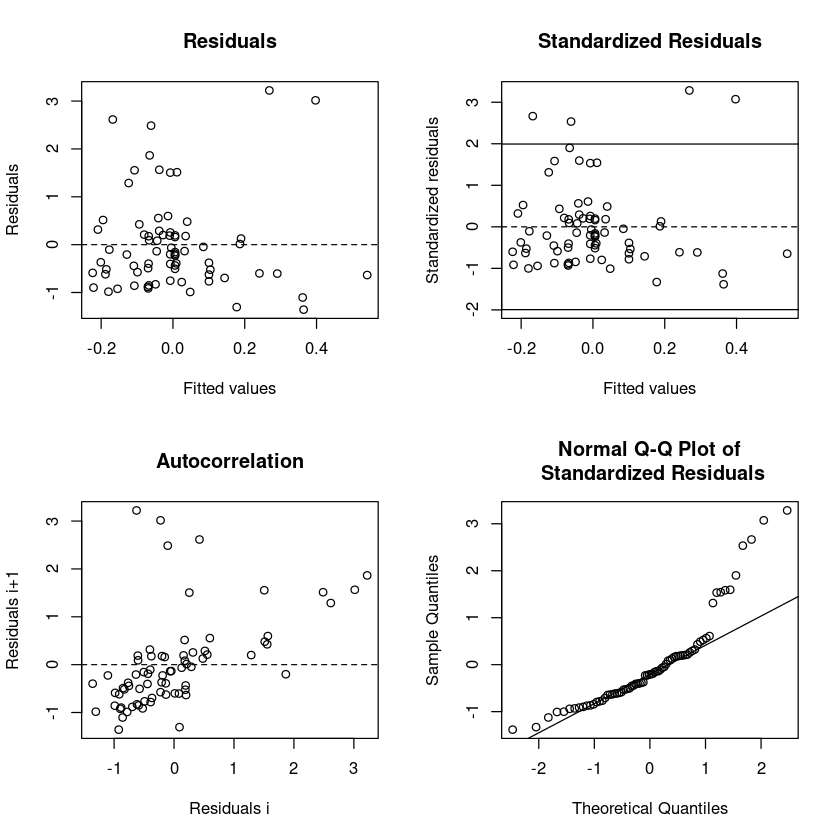

In [52]:
start = list(b1 = -0.04, b2 = 33.0, b3 = 0.04)
nlm_task3 <- nls(y ~ b1 * (sign(x) - 5.0) ^ 8.0 + b2 + b3 * (-sin(x) - 7.0) ^ 3.0, start = start)

nlm_task3_res <- nlsResiduals(nlm_task3)$resi1[, "Residuals"]  # y - predict(nlm_task3)
cat(sprintf("Pseudo-coefficient of determination: %.5f\n",
            1.0 - sum(nlm_task3_res ^ 2.0) / sum((y - mean(y)) ^ 2.0)))
cat(sprintf("Residual sum of squares: %.5f", sum(nlm_task3_res ^ 2.0)))

plot(x, y, main = "Nonlinear Regression Plot",
     xlab = "Concentration", ylab = "Active Cases",
     xlim = c(-1.5, 3.5), ylim = c(-1.5, 3.5), col = "blue", pch = 1)
lines(sort(x), predict(nlm_task3)[order(x)], col = "red")

par(mfrow = c(2, 2))
plot(nlsResiduals(nlm_task3))


It can be observed that the assumption of **linearity** holds at least to some extent. When the residuals are plotted against the fitted values, the red graph may reveal a somewhat fitted pattern, but remains overall rather horizontal along the zero axis. However, from the scale–location plot, it can be inferred that **heteroscedasticity** is present, since the variances of the residual points seem nonconstant. Also, the Q–Q plot is not indicative of **normality**, as the points do not form a straight line fitting the reference line. In these respects, linear regression is not plausible. The nonlinear approach produces a smaller error value and is therefore the preferred model in the following test scenarios.

### Would the quality of linear regression improve if we used other dependent variables?

Coefficient of determination: 0.00003
Residual sum of squares: 69.99791

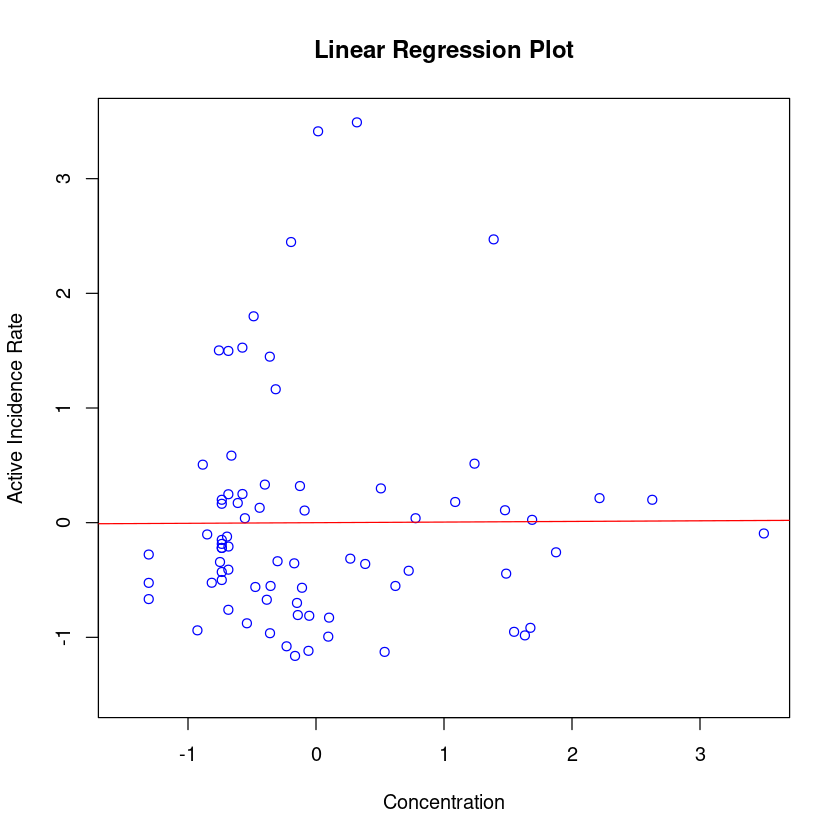

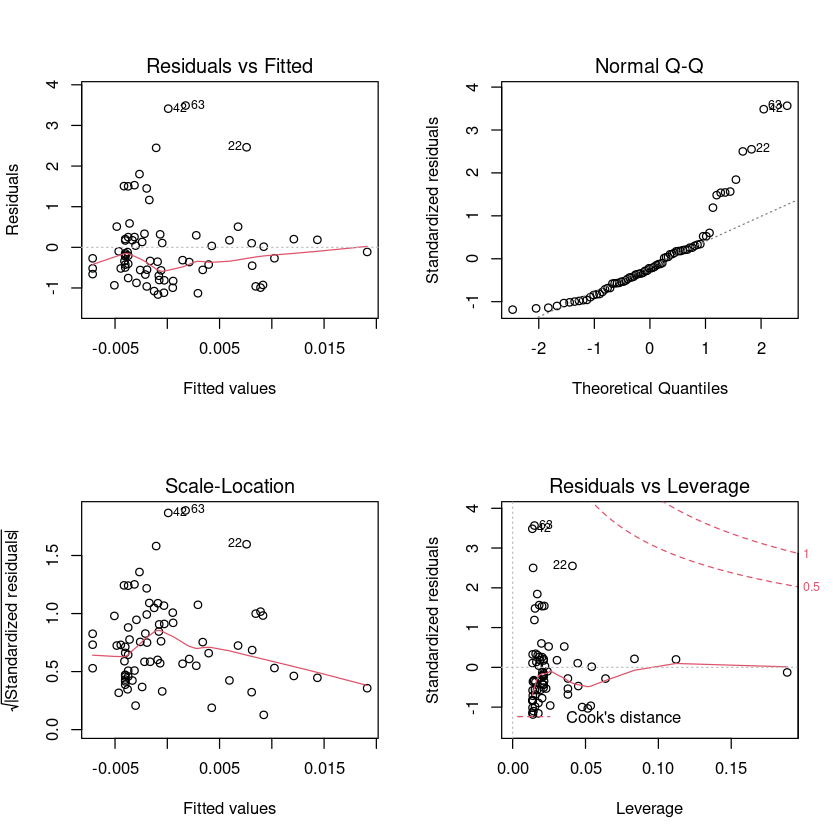

In [53]:
lm_task3_alt1 <- lm(df_final$"Active Incidence Rate" ~ x)

lm_task3_alt1_res <- lm_task3_alt1$residuals
cat(sprintf("Coefficient of determination: %.5f\n", summary(lm_task3_alt1)$r.squared))
cat(sprintf("Residual sum of squares: %.5f", sum(lm_task3_alt1_res ^ 2.0)))

plot(x, df_final$"Active Incidence Rate", main = "Linear Regression Plot",
     xlab = "Concentration", ylab = "Active Incidence Rate",
     xlim = c(-1.5, 3.5), ylim = c(-1.5, 3.5), col = "blue", pch = 1)
abline(lm_task3_alt1, col = "red")

par(mfrow = c(2, 2))
plot(lm_task3_alt1)


Coefficient of determination: 0.00008
Residual sum of squares: 69.99420

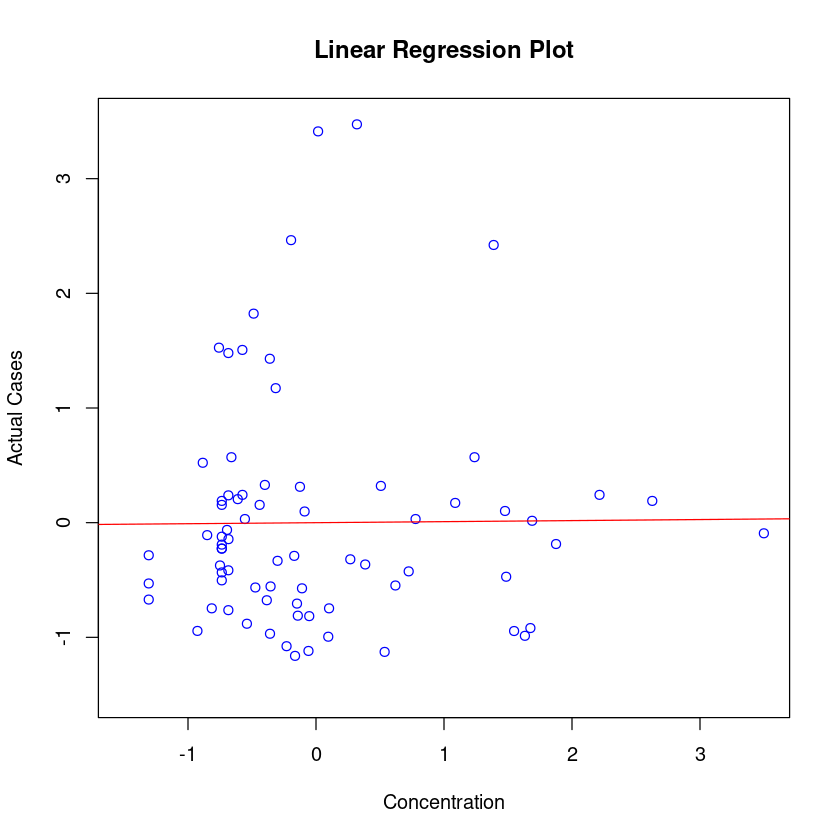

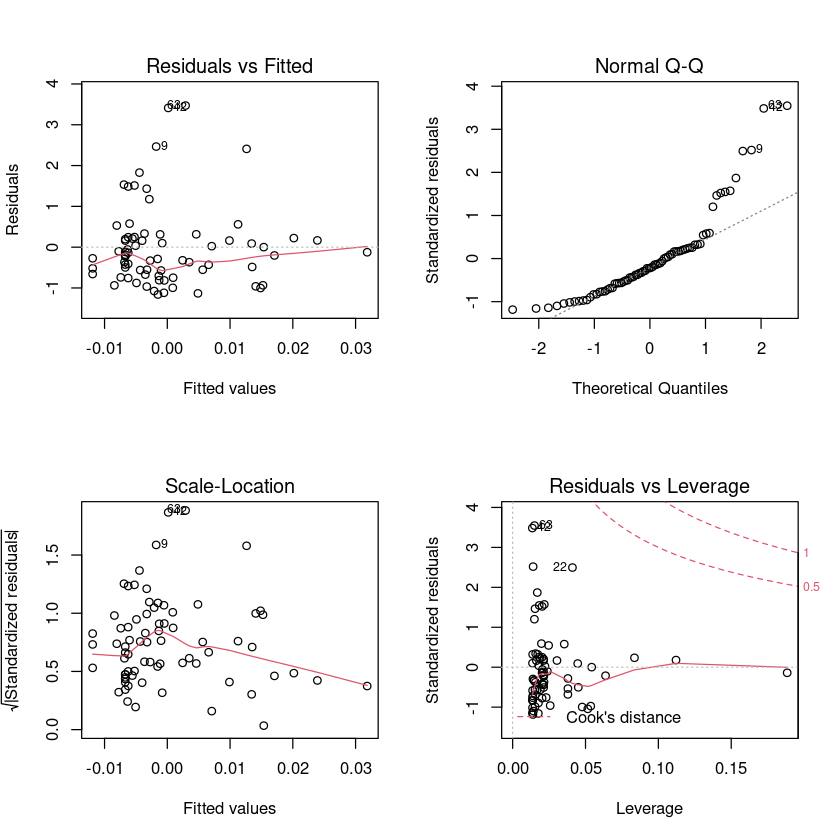

In [54]:
lm_task3_alt2 <- lm(df_final$"Actual Cases" ~ x)

lm_task3_alt2_res <- lm_task3_alt2$residuals
cat(sprintf("Coefficient of determination: %.5f\n", summary(lm_task3_alt2)$r.squared))
cat(sprintf("Residual sum of squares: %.5f", sum(lm_task3_alt2_res ^ 2.0)))

plot(x, df_final$"Actual Cases", main = "Linear Regression Plot",
     xlab = "Concentration", ylab = "Actual Cases",
     xlim = c(-1.5, 3.5), ylim = c(-1.5, 3.5), col = "blue", pch = 1)
abline(lm_task3_alt2, col = "red")

par(mfrow = c(2, 2))
plot(lm_task3_alt2)


Neither the coefficient of determination $R^{2}$ nor the residual sum of squares notably change when using other dependent variables instead of `Active Cases`. This results from the fact that `Active Incidence Rate` and `Actual Cases` are closely related to `Active Cases`.

### Are the residuals normally distributed?

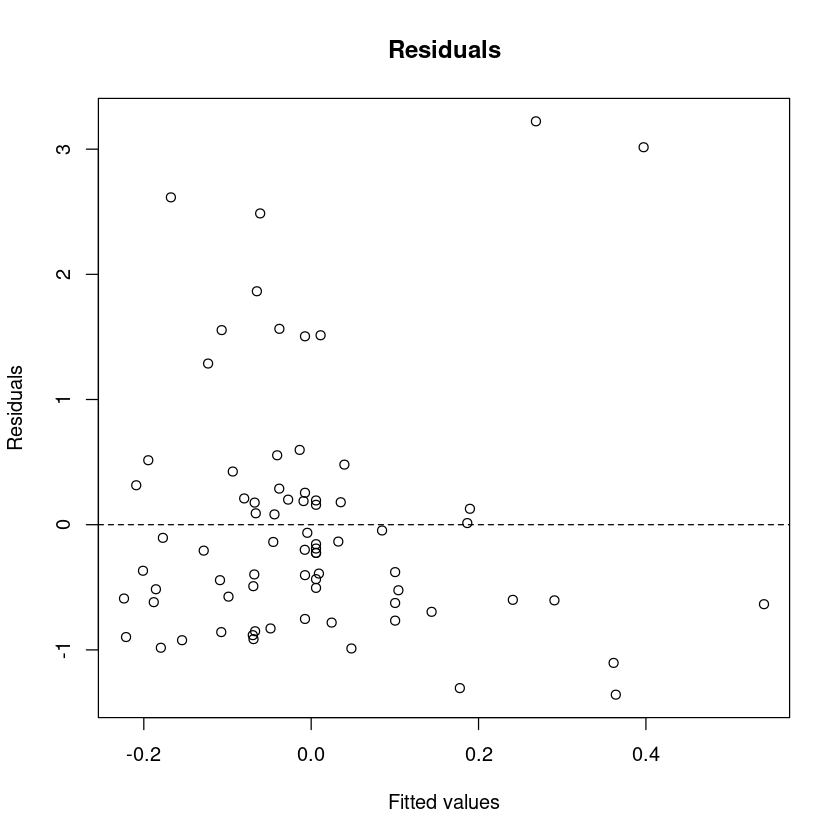

In [55]:
plot(nlsResiduals(nlm_task3), which = 1)


In [56]:
p1 <- ad.test(nlm_task3_res)$p.value
p2 <- cvm.test(nlm_task3_res)$p.value
p3 <- lillie.test(nlm_task3_res)$p.value
p4 <- pearson.test(nlm_task3_res)$p.value
p5 <- sf.test(nlm_task3_res)$p.value
p6 <- ks.test(unique(nlm_task3_res), "pnorm")$p.value
p7 <- mean(p1, p2, p3, p4, p5, p6)

cat(sprintf("Anderson–Darling test:      p = %.10f\n", p1))
cat(sprintf("Cramer–von Mises test:      p = %.10f\n", p2))
cat(sprintf("Lilliefors test:            p = %.10f\n", p3))
cat(sprintf("Pearson's chi-squared test: p = %.10f\n", p4))
cat(sprintf("Shapiro–Francia test:       p = %.10f\n", p5))
cat(sprintf("Kolmogorov–Smirnov test:    p = %.10f\n", p6))
cat(sprintf("Average of tests:           p = %.10f", p7))


Anderson–Darling test:      p = 0.0000000099
Cramer–von Mises test:      p = 0.0000005394
Lilliefors test:            p = 0.0000132421
Pearson's chi-squared test: p = 0.0001504374
Shapiro–Francia test:       p = 0.0000020957
Kolmogorov–Smirnov test:    p = 0.0247843198
Average of tests:           p = 0.0000000099

Neither the $p$-values from the Kolmogorov–Smirnov test nor from the omnibus tests exceed the threshold of $p = 0.05$, which clearly refutes a conclusion towards normality. The residual plot supports this argument, since it appears rather skewed.

### Are there outliers?

Possible outliers: 1.79987, 2.42561, 2.44727, 3.4125, 3.49071

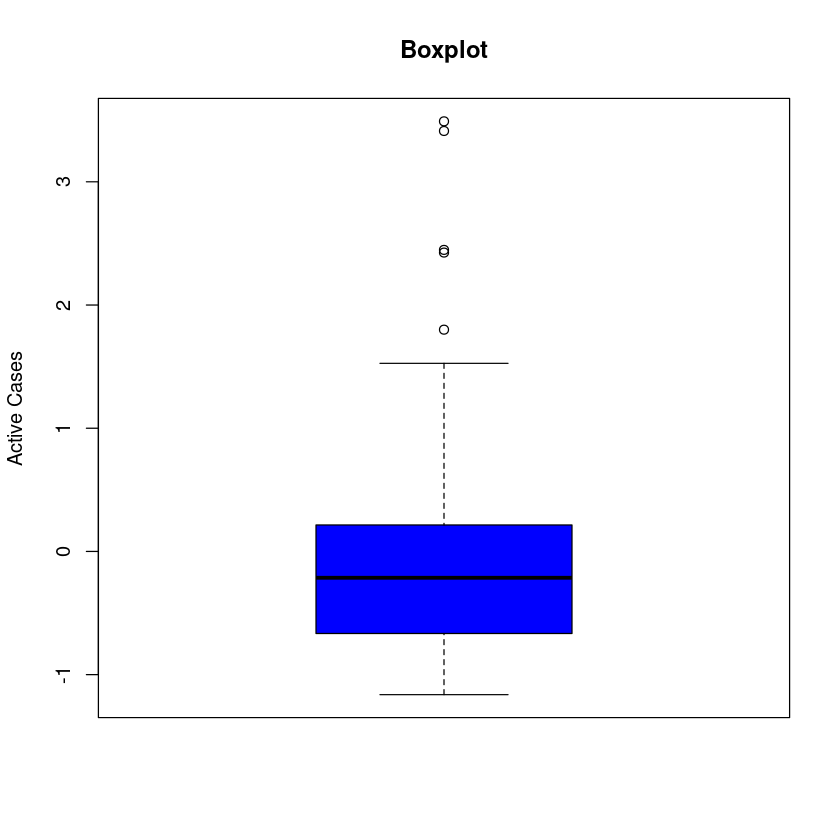

In [57]:
boxplot(y, main = "Boxplot", ylab = "Active Cases", col = "blue", pch = 1)

out <- boxplot.stats(y, coef = 1.5)$out
cat(sprintf("Possible outliers: %s", paste(trunc(sort(out) * 1e+05) / 1e+05, collapse=", ")))


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.1624 -0.6416 -0.2138  0.0000  0.2109  3.4907 

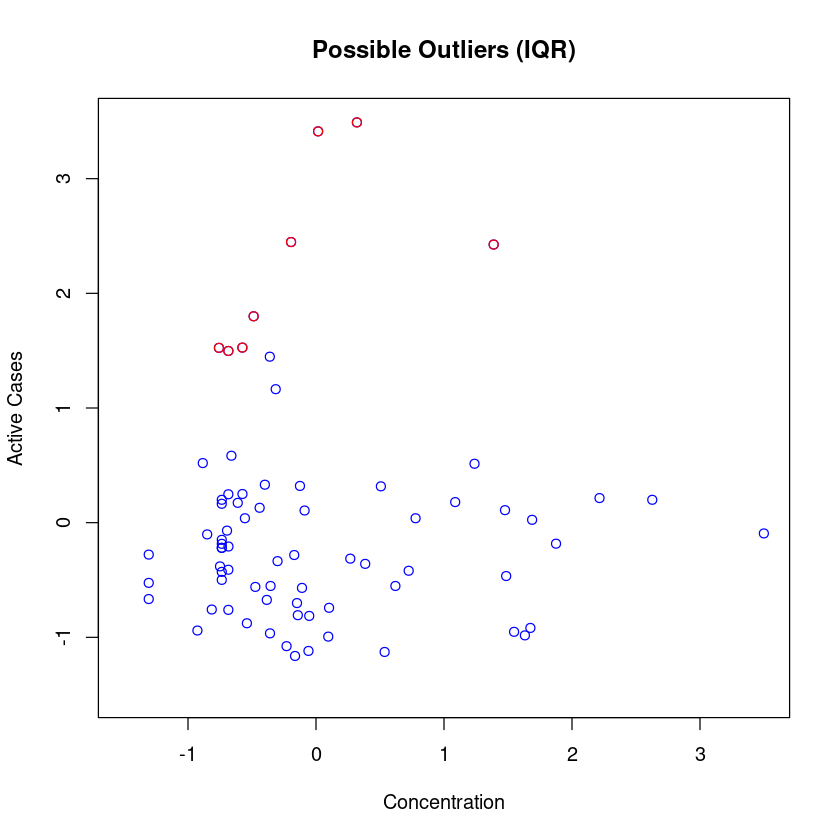

In [58]:
summary(y)

q3 <- quantile(y)[["75%"]]
q1 <- quantile(y)[["25%"]]
iqr = q3 - q1

out_upper <- q3 + 1.5 * iqr
out_lower <- q1 - 1.5 * iqr
out_mask <- y > out_upper | y < out_lower

x_out <- x[out_mask]
y_out <- y[out_mask]

plot(x, y, main = "Possible Outliers (IQR)",
     xlab = "Concentration", ylab = "Active Cases",
     xlim = c(-1.5, 3.5), ylim = c(-1.5, 3.5), col = "blue", pch = 1)
points(x_out, y_out, col = "red", pch = 1)


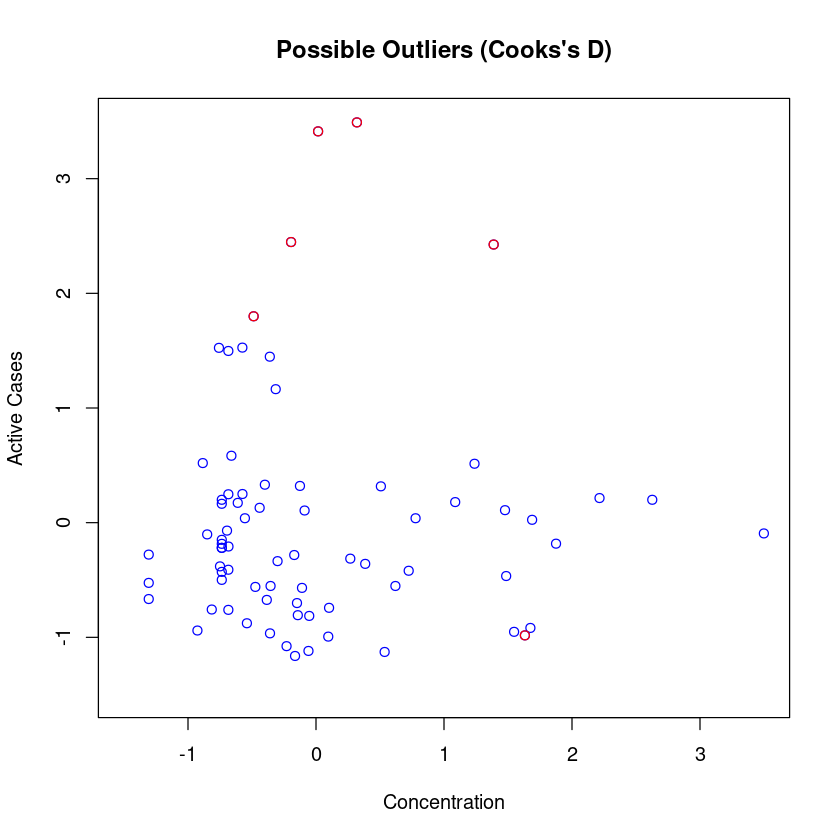

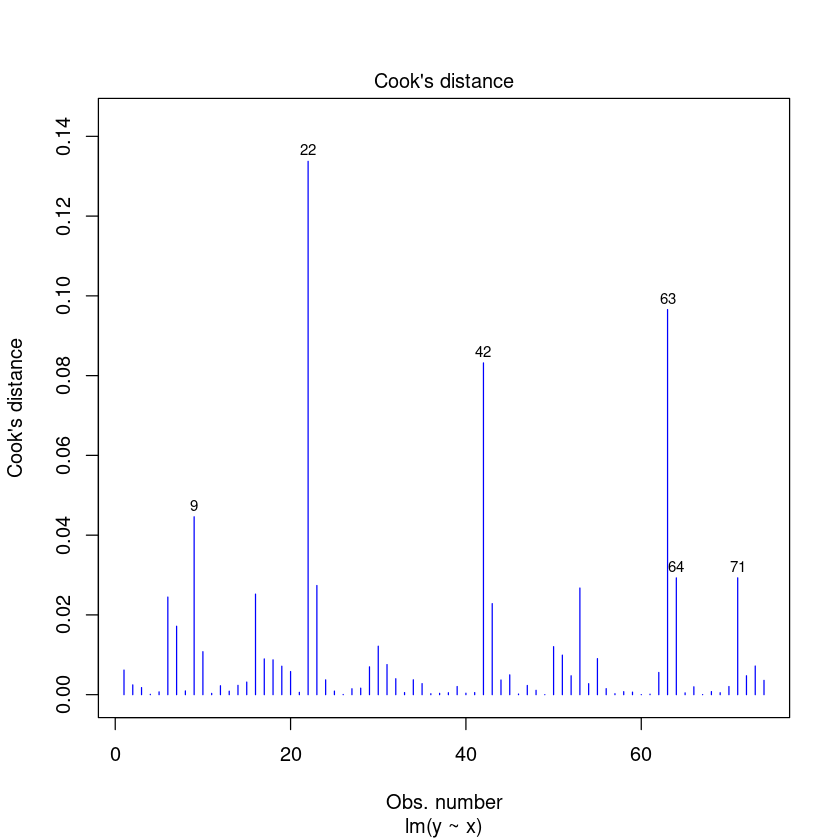

In [59]:
cooksd <- cooks.distance(lm_task3)
cooksd_mask <- as.integer(names(tail(sort(cooksd), 6)))

x_cooksd <- x[cooksd_mask]
y_cooksd <- y[cooksd_mask]

plot(x, y, main = "Possible Outliers (Cooks's D)",
     xlab = "Concentration", ylab = "Active Cases",
     xlim = c(-1.5, 3.5), ylim = c(-1.5, 3.5), col = "blue", pch = 1)
points(x_cooksd, y_cooksd, col = "red", pch = 1)

plot(lm_task3, which = 4, id.n = 6, col = "blue")


In [60]:
i <- 1
for (j in rev(order(y[out_mask]))) {
    element <- which(out_mask)[j]
    value <- y[out_mask][j]
    rank <- which(rev(sort(cooksd)) == cooksd[out_mask][j])
    cat(sprintf(paste("Outlier #%02d is element #%02d with a value of %.5f",
                      "and is ranked #%02d among the largest Cook's distances.\n"),
                i, element, value, rank))
    i <- i + 1
}


Outlier #01 is element #63 with a value of 3.49072 and is ranked #02 among the largest Cook's distances.
Outlier #02 is element #42 with a value of 3.41251 and is ranked #03 among the largest Cook's distances.
Outlier #03 is element #09 with a value of 2.44727 and is ranked #04 among the largest Cook's distances.
Outlier #04 is element #22 with a value of 2.42562 and is ranked #01 among the largest Cook's distances.
Outlier #05 is element #64 with a value of 1.79988 and is ranked #06 among the largest Cook's distances.
Outlier #06 is element #43 with a value of 1.52665 and is ranked #11 among the largest Cook's distances.
Outlier #07 is element #23 with a value of 1.52467 and is ranked #07 among the largest Cook's distances.
Outlier #08 is element #06 with a value of 1.49748 and is ranked #10 among the largest Cook's distances.


According to the boxplot and the IQR criterion, five and eight possible outliers can be identified in the data, respectively. The measures used by the built-in `boxplot()` method seem to differ from the standard IQR criterion—leading to less detected outliers. Nonetheless, these outliers might affect the residual sum of squares and impair the predictive power of the model. The suspicion is confirmed by the fact that the top five outliers are among the six largest Cook's distances.

### Does adding variables lead to better regression?

In [61]:
lm_task3 <- lm(y ~ x)

lm_task3_res <- lm_task3$residuals
cat(sprintf("Coefficient of determination: %.5f\n", summary(lm_task3)$r.squared))
cat(sprintf("Residual sum of squares: %.5f", sum(lm_task3_res ^ 2.0)))


Coefficient of determination: 0.00007
Residual sum of squares: 69.99505

In [62]:
lm_task3_alt3 <- lm(y ~ x + df_final$"Confirmed cases" + df_final$"Accumulated Incidence"
                    + df_final$"Actual Incidence Rate" + df_final$"Active Incidence Rate")

lm_task3_alt3_res <- lm_task3_alt3$residuals
cat(sprintf("Coefficient of determination: %.5f\n", summary(lm_task3_alt3)$r.squared))
cat(sprintf("Residual sum of squares: %.5f", sum(lm_task3_alt3_res ^ 2.0)))


Coefficient of determination: 0.99922
Residual sum of squares: 0.05493

Coefficient of determination: 0.07751
Residual sum of squares: 64.57447

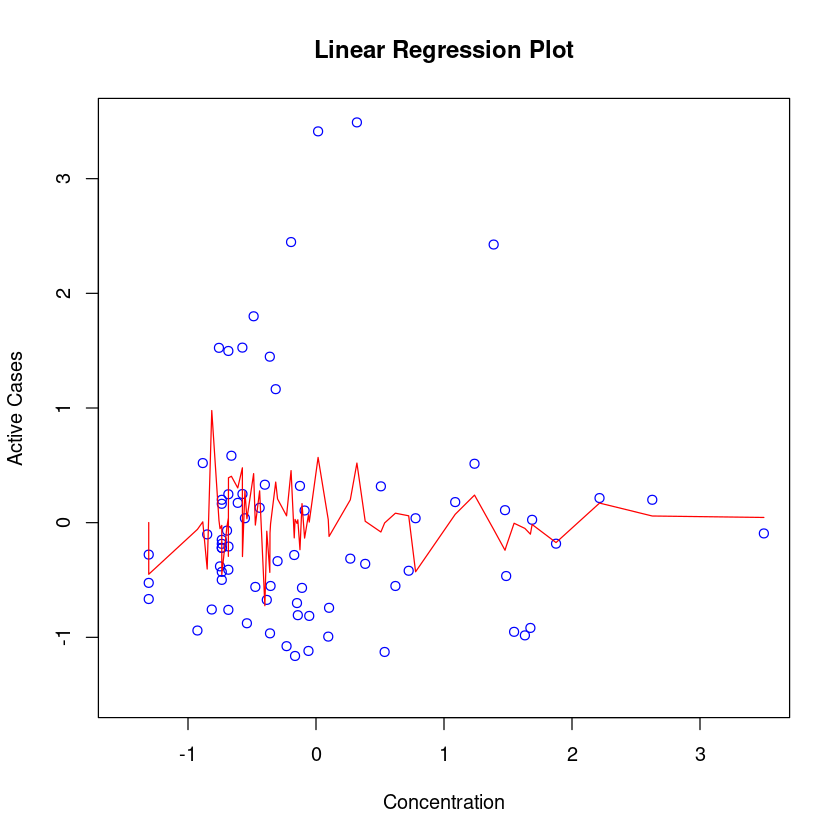

In [63]:
lm_task3_alt4 <- lm(y ~ x + df_final$"Confirmed cases")

lm_task3_alt4_res <- lm_task3_alt4$residuals
cat(sprintf("Coefficient of determination: %.5f\n", summary(lm_task3_alt4)$r.squared))
cat(sprintf("Residual sum of squares: %.5f", sum(lm_task3_alt4_res ^ 2.0)))

plot(x, y, main = "Linear Regression Plot",
     xlab = "Concentration", ylab = "Active Cases",
     xlim = c(-1.5, 3.5), ylim = c(-1.5, 3.5), col = "blue", pch = 1)
lines(sort(x), lm_task3_alt4$fitted.values[order(x)], col = "red")


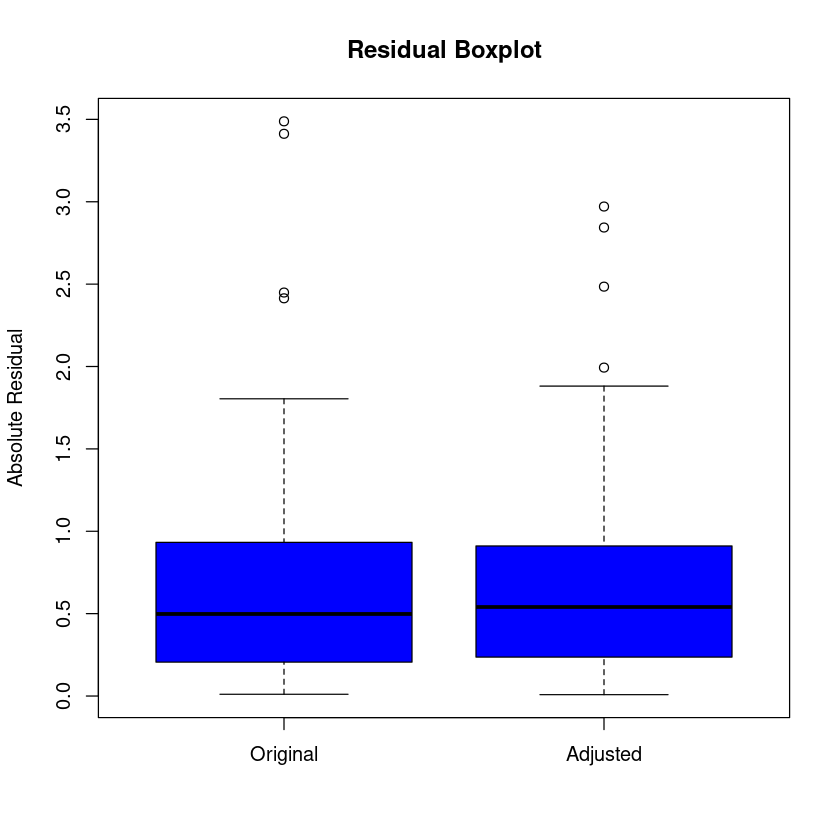

In [64]:
boxplot(cbind(abs(lm_task3_res), abs(lm_task3_alt4_res)), main = "Residual Boxplot",
        names = c("Original", "Adjusted"), ylab = "Absolute Residual", col = "blue")


In [65]:
start = list(b1 = -0.04, b2 = 33.0, b3 = 0.04)
nlm_task3 <- nls(y ~ b1 * (sign(x) - 5.0) ^ 8.0 + b2 + b3 * (-sin(x) - 7.0) ^ 3.0, start = start)

nlm_task3_res <- nlsResiduals(nlm_task3)$resi1[, "Residuals"]  # y - predict(nlm_task3)
cat(sprintf("Pseudo-coefficient of determination: %.5f\n",
            1.0 - sum(nlm_task3_res ^ 2.0) / sum((y - mean(y)) ^ 2.0)))
cat(sprintf("Residual sum of squares: %.5f", sum(nlm_task3_res ^ 2.0)))


Pseudo-coefficient of determination: 0.02368
Residual sum of squares: 68.34270

Pseudo-coefficient of determination: 0.23731
Residual sum of squares: 53.38817

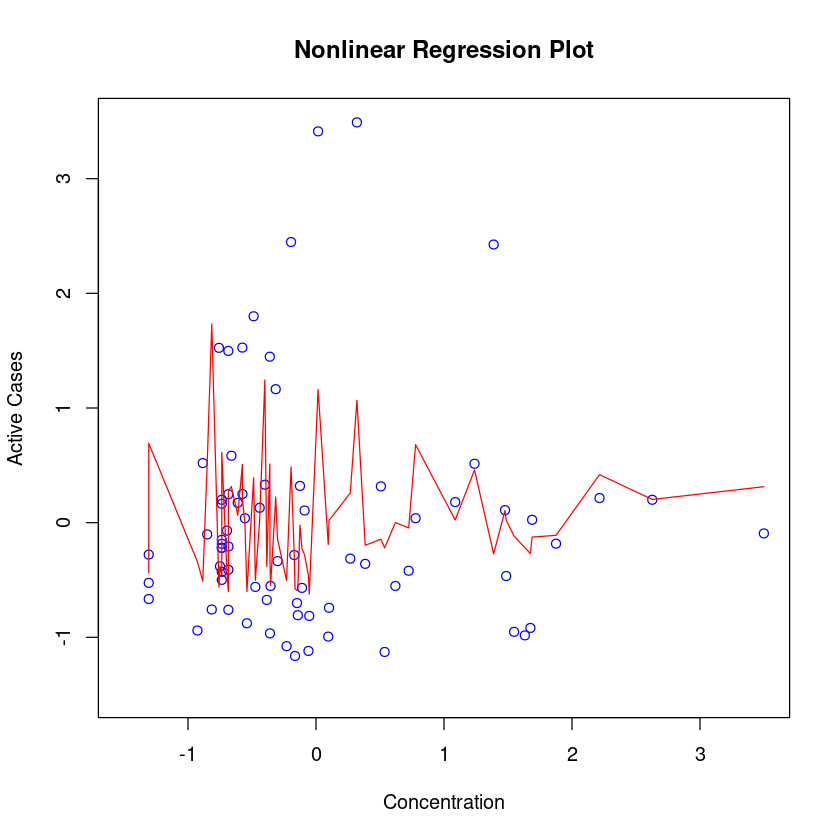

In [66]:
start = list(b1 = -0.04, b2 = 33.0, b3 = 0.04, b4 = 0.2)
nlm_task3_alt1 <- nls(y ~ b1 * (sign(x) - 5.0) ^ 8.0 + b2 + b3 * (-sin(x) - 7.0) ^ 3.0
                      + b4 * abs(df_final$"Confirmed cases"), start = start)

nlm_task3_alt1_res <- nlsResiduals(nlm_task3_alt1)$resi1[, "Residuals"]  # y - predict(nlm_task3_alt1)
cat(sprintf("Pseudo-coefficient of determination: %.5f\n",
            1.0 - sum(nlm_task3_alt1_res ^ 2.0) / sum((y - mean(y)) ^ 2.0)))
cat(sprintf("Residual sum of squares: %.5f", sum(nlm_task3_alt1_res ^ 2.0)))

plot(x, y, main = "Nonlinear Regression Plot",
     xlab = "Concentration", ylab = "Active Cases",
     xlim = c(-1.5, 3.5), ylim = c(-1.5, 3.5), col = "blue", pch = 1)
lines(sort(x), predict(nlm_task3_alt1)[order(x)], col = "red")


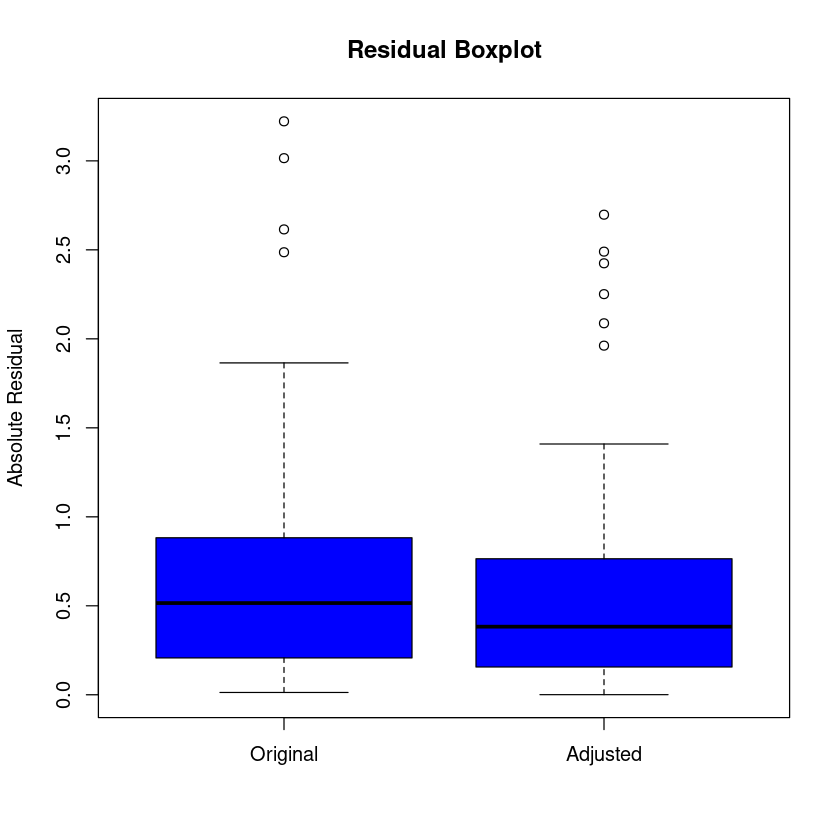

In [67]:
boxplot(cbind(abs(nlm_task3_res), abs(nlm_task3_alt1_res)), main = "Residual Boxplot",
        names = c("Original", "Adjusted"), ylab = "Absolute Residual", col = "blue")


Naturally, adding any independent variable related to cases and incidences results in (almost) perfect linear regression. If none of these varibales are chosen, the error still slightly decreases, while the coefficient of determination $R^{2}$ drastically increases from $0.007 \%$ to about $8 \%$. Regarding the nonlinear model, adding `Confirmed Cases` also improves the residual sum of squares.

## Task 4

### Is linear regression plausible?

In [68]:
x1 <- df_final$"Active Cases"
x2 <- df_final$"Actual Cases"
y <- df_final$"Concentration"


Coefficient of determination: 0.00234
Residual sum of squares: 69.83594

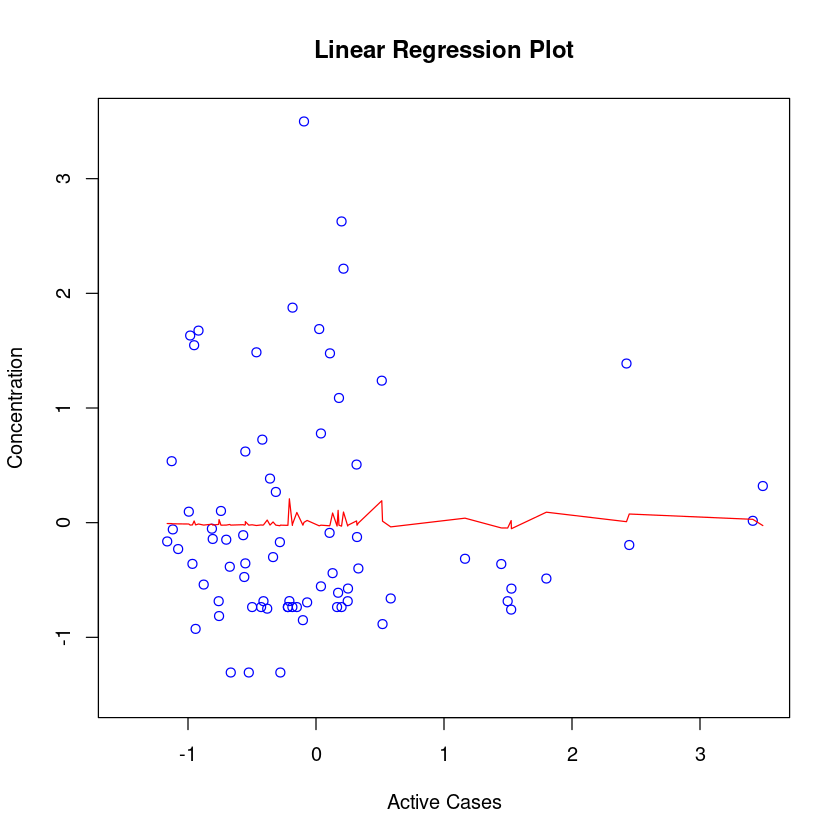

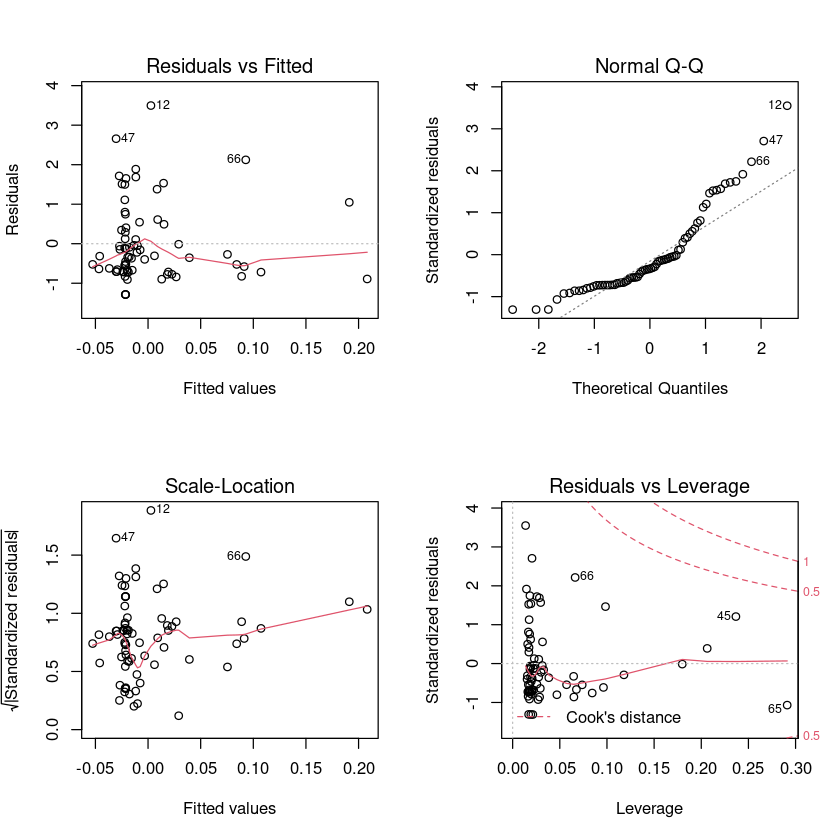

In [69]:
lm_task4 <- lm(y ~ x1 + x2)

lm_task4_res <- lm_task4$residuals
cat(sprintf("Coefficient of determination: %.5f\n", summary(lm_task4)$r.squared))
cat(sprintf("Residual sum of squares: %.5f", sum(lm_task4_res ^ 2.0)))

plot(x1, y, main = "Linear Regression Plot",
     xlab = "Active Cases", ylab = "Concentration",
     xlim = c(-1.5, 3.5), ylim = c(-1.5, 3.5), col = "blue", pch = 1)
lines(sort(x1), lm_task4$fitted.values[order(x1)], col = "red")

par(mfrow = c(2, 2))
plot(lm_task4)


Pseudo-coefficient of determination: 0.04942
Residual sum of squares: 66.54048

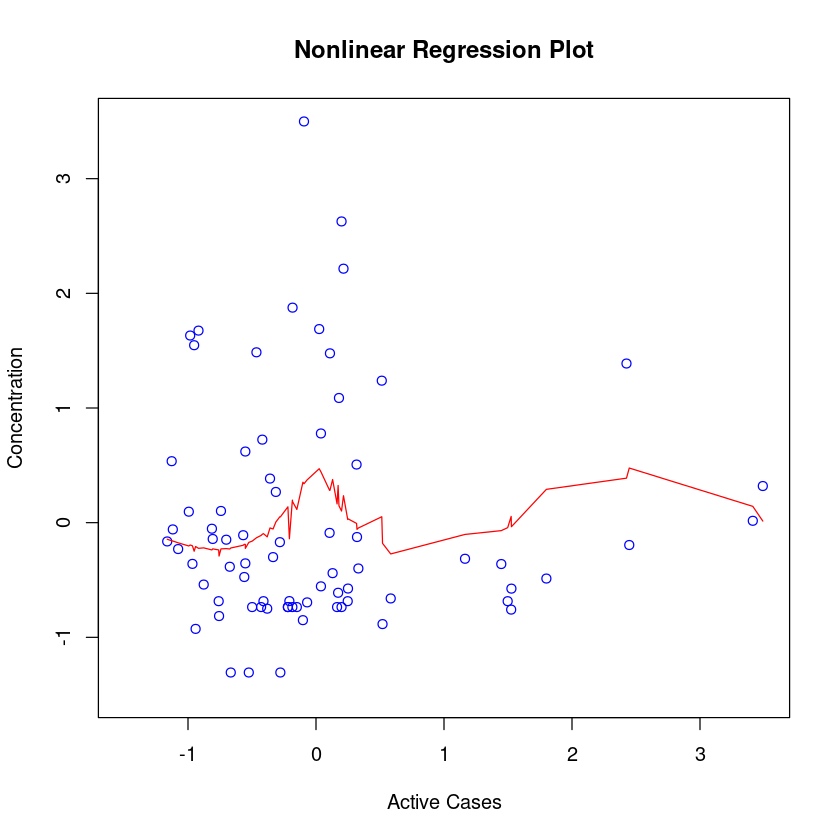

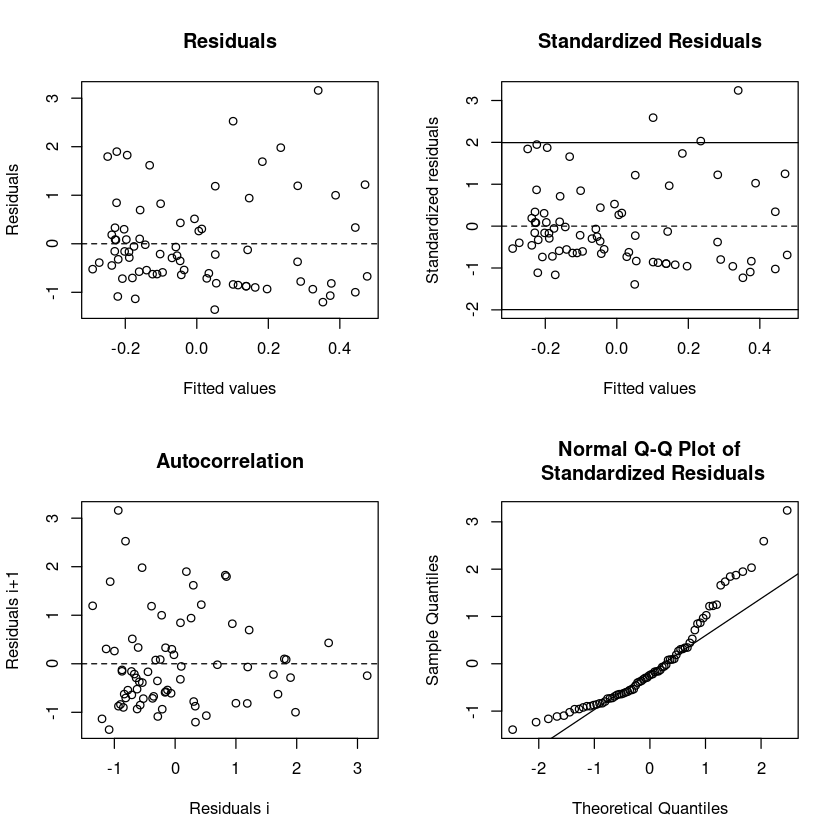

In [70]:
start = list(b1 = -0.04, b2 = 33.0, b3 = 0.04, b4 = 0.2)
nlm_task4 <- nls(y ~ b1 * (abs(x1) - 5.0) ^ 8.0 + b2 + b3 * (-abs(x1) - 7.0) ^ 3.0
                 + b4 * abs(x2), start = start)

nlm_task4_res <- nlsResiduals(nlm_task4)$resi1[, "Residuals"]  # y - predict(nlm_task4)
cat(sprintf("Pseudo-coefficient of determination: %.5f\n",
            1.0 - sum(nlm_task4_res ^ 2.0) / sum((y - mean(y)) ^ 2.0)))
cat(sprintf("Residual sum of squares: %.5f", sum(nlm_task4_res ^ 2.0)))

plot(x1, y, main = "Nonlinear Regression Plot",
     xlab = "Active Cases", ylab = "Concentration",
     xlim = c(-1.5, 3.5), ylim = c(-1.5, 3.5), col = "blue", pch = 1)
lines(sort(x1), predict(nlm_task4)[order(x1)], col = "red")

par(mfrow = c(2, 2))
plot(nlsResiduals(nlm_task4))


It can be observed that the assumption of **linearity** holds at least to some extent. When the residuals are plotted against the fitted values, the red graph may reveal a somewhat fitted pattern, but remains overall rather horizontal along the zero axis. However, from the scale–location plot, it can be inferred that **heteroscedasticity** is present, since the variances of the residual points seem nonconstant. Also, the Q–Q plot is not indicative of **normality**, as the points do not form a straight line fitting the reference line. In these respects, linear regression is not plausible. The nonlinear approach produces a smaller error value and is therefore the preferred model in the following test scenarios.

### Are the residuals normally distributed?

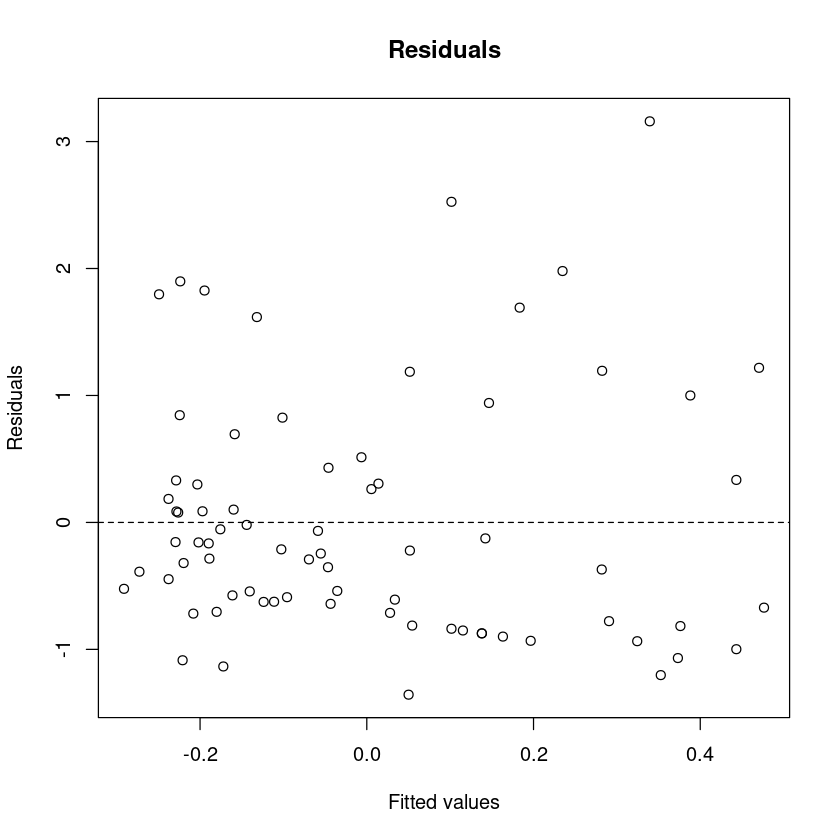

In [71]:
plot(nlsResiduals(nlm_task4), which = 1)


In [72]:
p1 <- ad.test(nlm_task4_res)$p.value
p2 <- cvm.test(nlm_task4_res)$p.value
p3 <- lillie.test(nlm_task4_res)$p.value
p4 <- pearson.test(nlm_task4_res)$p.value
p5 <- sf.test(nlm_task4_res)$p.value
p6 <- ks.test(unique(nlm_task4_res), "pnorm")$p.value
p7 <- mean(p1, p2, p3, p4, p5, p6)

cat(sprintf("Anderson–Darling test:      p = %.10f\n", p1))
cat(sprintf("Cramer–von Mises test:      p = %.10f\n", p2))
cat(sprintf("Lilliefors test:            p = %.10f\n", p3))
cat(sprintf("Pearson's chi-squared test: p = %.10f\n", p4))
cat(sprintf("Shapiro–Francia test:       p = %.10f\n", p5))
cat(sprintf("Kolmogorov–Smirnov test:    p = %.10f\n", p6))
cat(sprintf("Average of tests:           p = %.10f", p7))


Anderson–Darling test:      p = 0.0000041940
Cramer–von Mises test:      p = 0.0000212974
Lilliefors test:            p = 0.0022718915
Pearson's chi-squared test: p = 0.0219581758
Shapiro–Francia test:       p = 0.0000703540
Kolmogorov–Smirnov test:    p = 0.1489999422
Average of tests:           p = 0.0000041940

Even though the Kolmogorov–Smirnov test slightly exceeds the threshold of $p = 0.05$, the omnibus tests clearly refute a conclusion towards normality. The residual plot supports this argument, since it appears rather skewed.

### Are there outliers?

Possible outliers: 2.21503, 2.62707, 3.49893

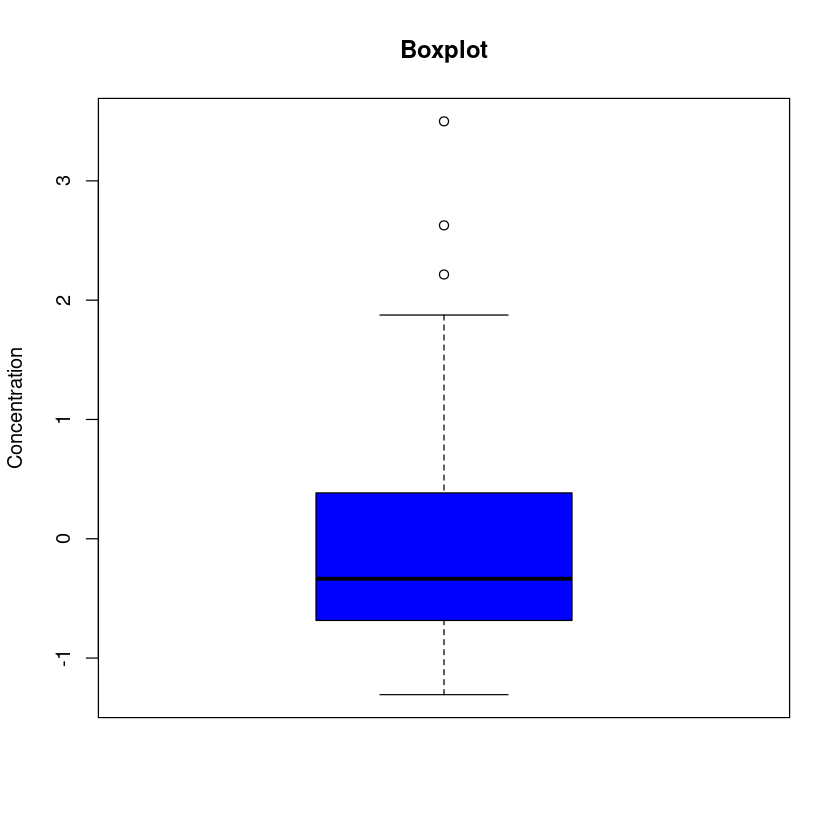

In [73]:
boxplot(y, main = "Boxplot", ylab = "Concentration", col = "blue", pch = 1)

out <- boxplot.stats(y, coef = 1.5)$out
cat(sprintf("Possible outliers: %s", paste(trunc(sort(out) * 1e+05) / 1e+05, collapse=", ")))


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.3068 -0.6847 -0.3349  0.0000  0.3682  3.4989 

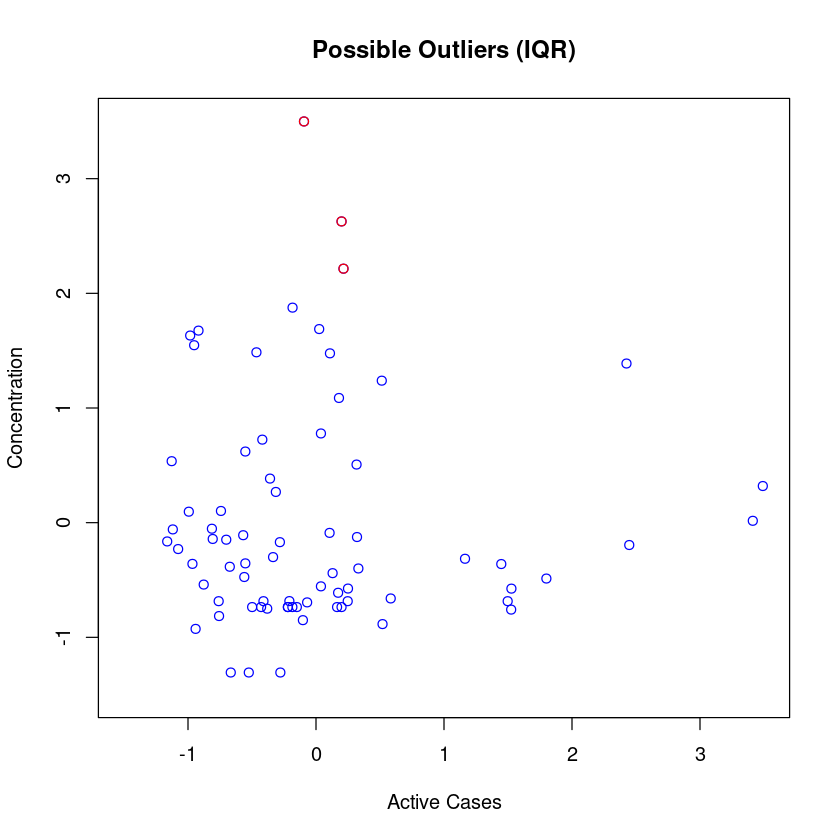

In [74]:
summary(y)

q3 <- quantile(y)[["75%"]]
q1 <- quantile(y)[["25%"]]
iqr = q3 - q1

out_upper <- q3 + 1.5 * iqr
out_lower <- q1 - 1.5 * iqr
out_mask <- y > out_upper | y < out_lower

x1_out <- x1[out_mask]
y_out <- y[out_mask]

plot(x1, y, main = "Possible Outliers (IQR)",
     xlab = "Active Cases", ylab = "Concentration",
     xlim = c(-1.5, 3.5), ylim = c(-1.5, 3.5), col = "blue", pch = 1)
points(x1_out, y_out, col = "red", pch = 1)


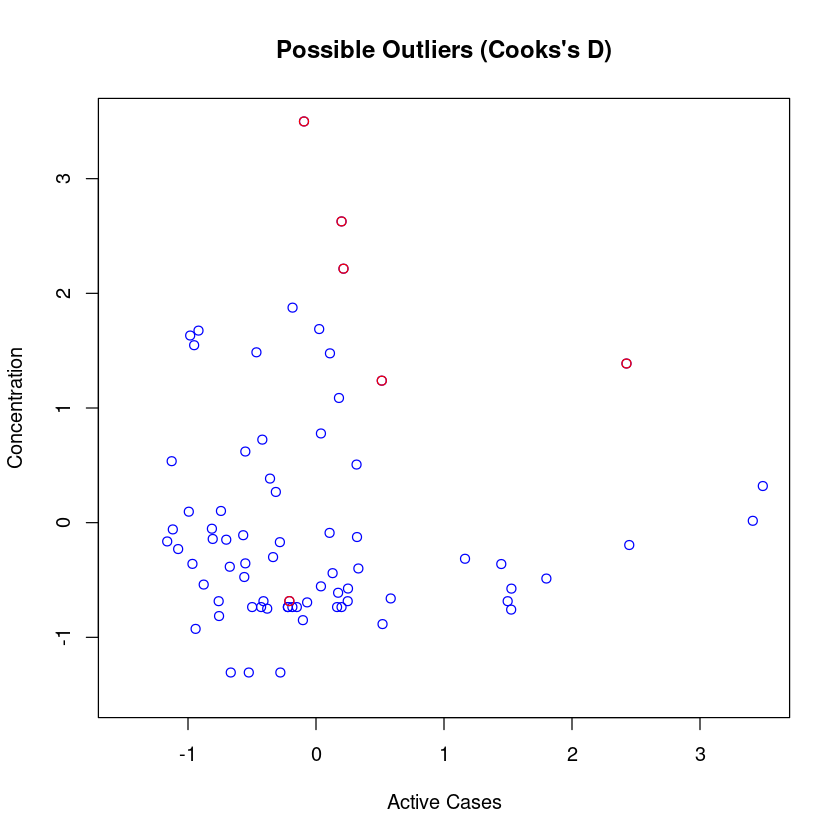

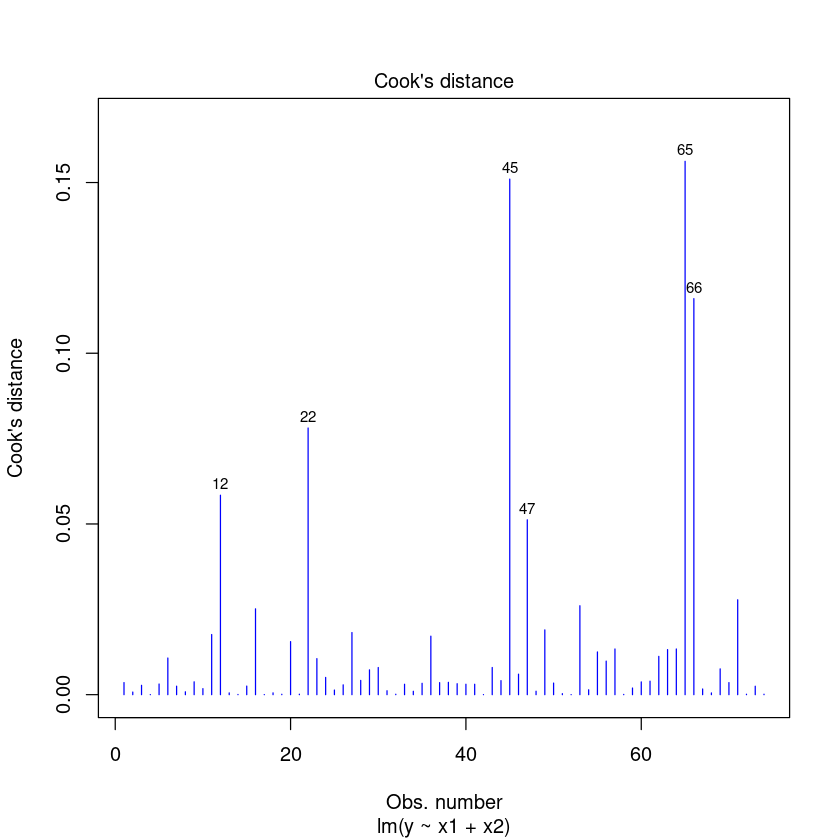

In [75]:
cooksd <- cooks.distance(lm_task4)
cooksd_mask <- as.integer(names(tail(sort(cooksd), 6)))

x1_cooksd <- x1[cooksd_mask]
y_cooksd <- y[cooksd_mask]

plot(x1, y, main = "Possible Outliers (Cooks's D)",
     xlab = "Active Cases", ylab = "Concentration",
     xlim = c(-1.5, 3.5), ylim = c(-1.5, 3.5), col = "blue", pch = 1)
points(x1_cooksd, y_cooksd, col = "red", pch = 1)

plot(lm_task4, which = 4, id.n = 6, col = "blue")


In [76]:
i <- 1
for (j in rev(order(y[out_mask]))) {
    element <- which(out_mask)[j]
    value <- y[out_mask][j]
    rank <- which(rev(sort(cooksd)) == cooksd[out_mask][j])
    cat(sprintf(paste("Outlier #%02d is element #%02d with a value of %.5f",
                      "and is ranked #%02d among the largest Cook's distances.\n"),
                i, element, value, rank))
    i <- i + 1
}


Outlier #01 is element #12 with a value of 3.49893 and is ranked #05 among the largest Cook's distances.
Outlier #02 is element #47 with a value of 2.62707 and is ranked #06 among the largest Cook's distances.
Outlier #03 is element #66 with a value of 2.21504 and is ranked #03 among the largest Cook's distances.


According to the boxplot and the IQR criterion, three possible outliers can be identified in the data. These outliers might affect the residual sum of squares and impair the predictive power of the model. The suspicion is confirmed by the fact that all three outliers are among the six largest Cook's distances.

### Does adding variables lead to better regression?

In [77]:
lm_task4 <- lm(y ~ x1 + x2)

lm_task4_res <- lm_task4$residuals
cat(sprintf("Coefficient of determination: %.5f\n", summary(lm_task4)$r.squared))
cat(sprintf("Residual sum of squares: %.5f", sum(lm_task4_res ^ 2.0)))


Coefficient of determination: 0.00234
Residual sum of squares: 69.83594

Coefficient of determination: 0.10007
Residual sum of squares: 62.99540

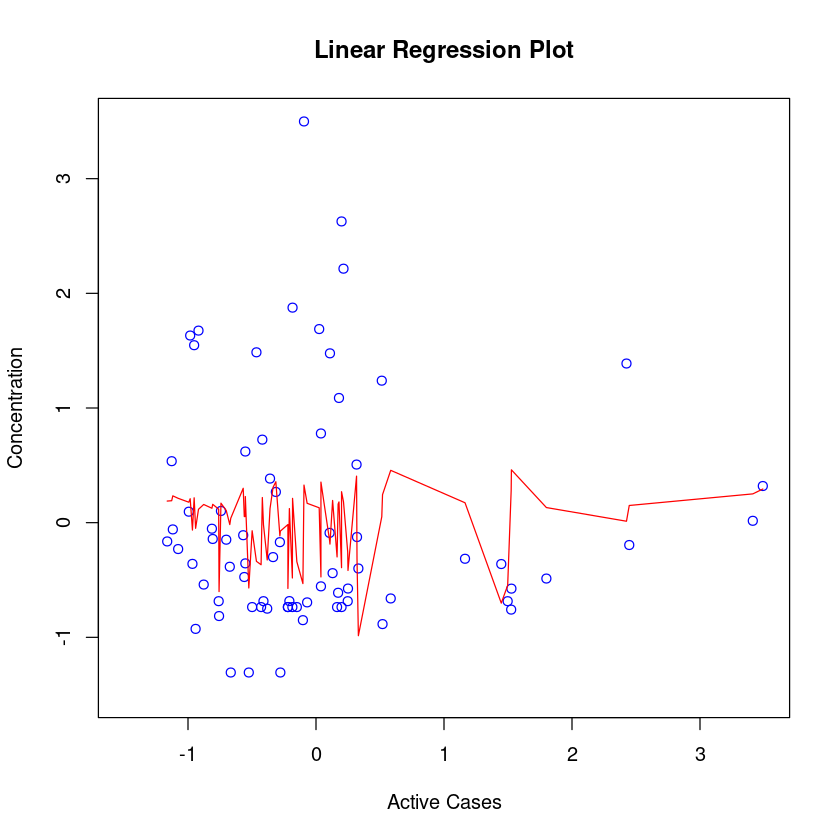

In [78]:
lm_task4_alt1 <- lm(y ~ x1 + x2 + df_final$"Confirmed cases" + df_final$"Accumulated Incidence"
                    + df_final$"Actual Incidence Rate" + df_final$"Active Incidence Rate")

lm_task4_alt1_res <- lm_task4_alt1$residuals
cat(sprintf("Coefficient of determination: %.5f\n", summary(lm_task4_alt1)$r.squared))
cat(sprintf("Residual sum of squares: %.5f", sum(lm_task4_alt1_res ^ 2.0)))

plot(x1, y, main = "Linear Regression Plot",
     xlab = "Active Cases", ylab = "Concentration",
     xlim = c(-1.5, 3.5), ylim = c(-1.5, 3.5), col = "blue", pch = 1)
lines(sort(x1), lm_task4_alt1$fitted.values[order(x1)], col = "red")


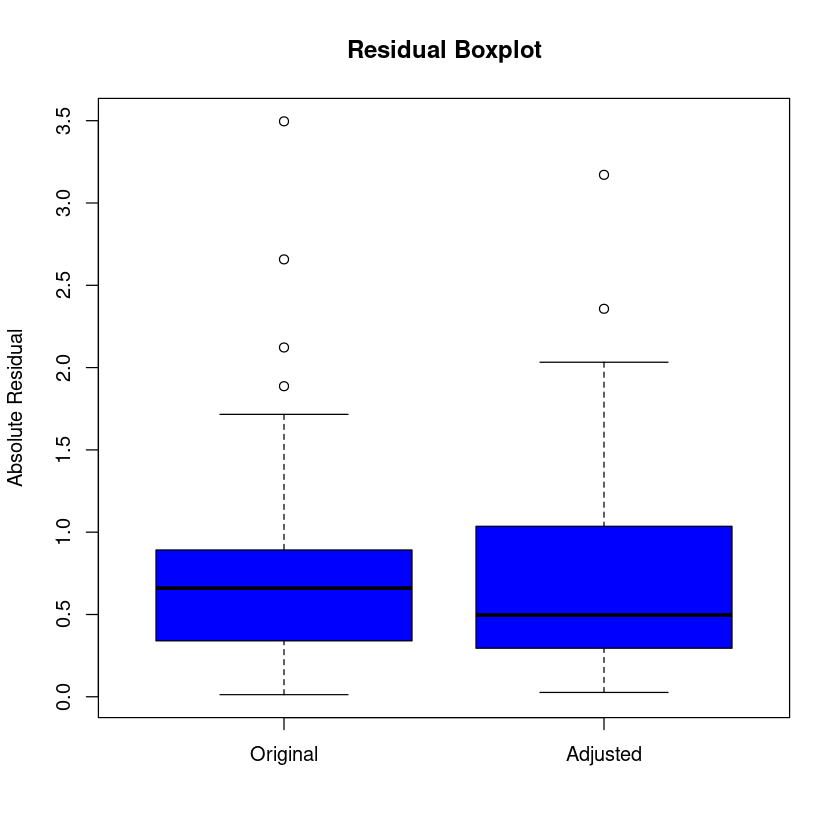

In [79]:
boxplot(cbind(abs(lm_task4_res), abs(lm_task4_alt1_res)), main = "Residual Boxplot",
        names = c("Original", "Adjusted"), ylab = "Absolute Residual", col = "blue")


In [80]:
start = list(b1 = -0.04, b2 = 33.0, b3 = 0.04, b4 = 0.2)
nlm_task4 <- nls(y ~ b1 * (abs(x1) - 5.0) ^ 8.0 + b2 + b3 * (-abs(x1) - 7.0) ^ 3.0
                 + b4 * abs(x2), start = start)

nlm_task4_res <- nlsResiduals(nlm_task4)$resi1[, "Residuals"]  # y - predict(nlm_task4)
cat(sprintf("Pseudo-coefficient of determination: %.5f\n",
            1.0 - sum(nlm_task4_res ^ 2.0) / sum((y - mean(y)) ^ 2.0)))
cat(sprintf("Residual sum of squares: %.5f", sum(nlm_task4_res ^ 2.0)))


Pseudo-coefficient of determination: 0.04942
Residual sum of squares: 66.54048

Pseudo-coefficient of determination: 0.12120
Residual sum of squares: 61.51613

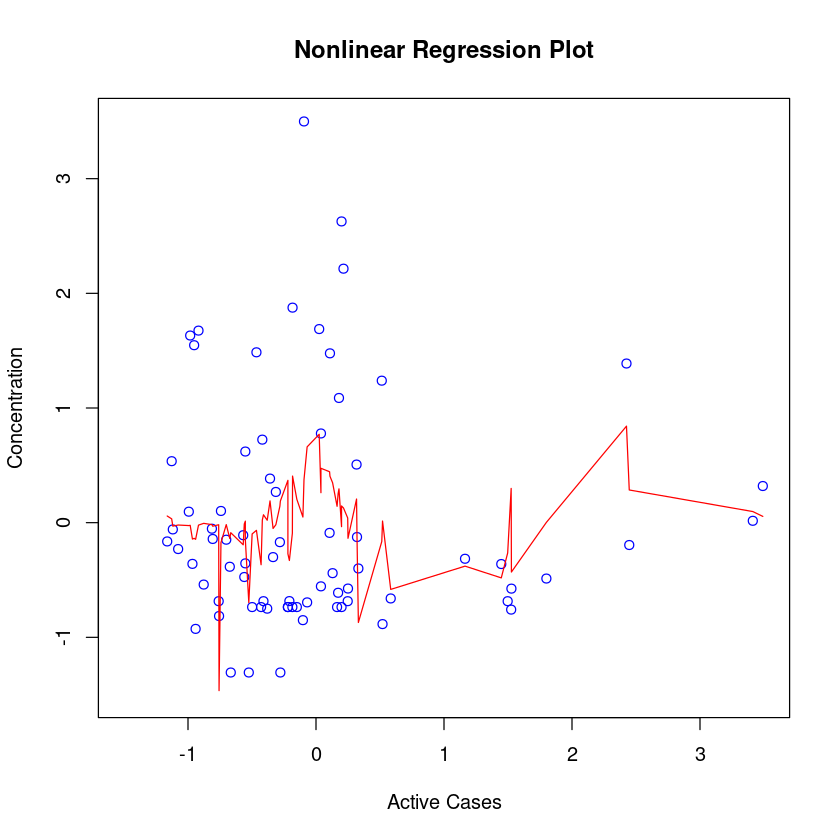

In [81]:
start = list(b1 = -0.04, b2 = 33.0, b3 = 0.04, b4 = 0.2, b5 = 0.1)
nlm_task4_alt1 <- nls(y ~ b1 * (abs(x1) - 5.0) ^ 8.0 + b2 + b3 * (-abs(x1) - 7.0) ^ 3.0
                      + b4 * abs(x2) + b5 * abs(df_final$"Confirmed cases"), start = start)

nlm_task4_alt1_res <- nlsResiduals(nlm_task4_alt1)$resi1[, "Residuals"]  # y - predict(nlm_task4_alt1)
cat(sprintf("Pseudo-coefficient of determination: %.5f\n",
            1.0 - sum(nlm_task4_alt1_res ^ 2.0) / sum((y - mean(y)) ^ 2.0)))
cat(sprintf("Residual sum of squares: %.5f", sum(nlm_task4_alt1_res ^ 2.0)))

plot(x1, y, main = "Nonlinear Regression Plot",
     xlab = "Active Cases", ylab = "Concentration",
     xlim = c(-1.5, 3.5), ylim = c(-1.5, 3.5), col = "blue", pch = 1)
lines(sort(x1), predict(nlm_task4_alt1)[order(x1)], col = "red")


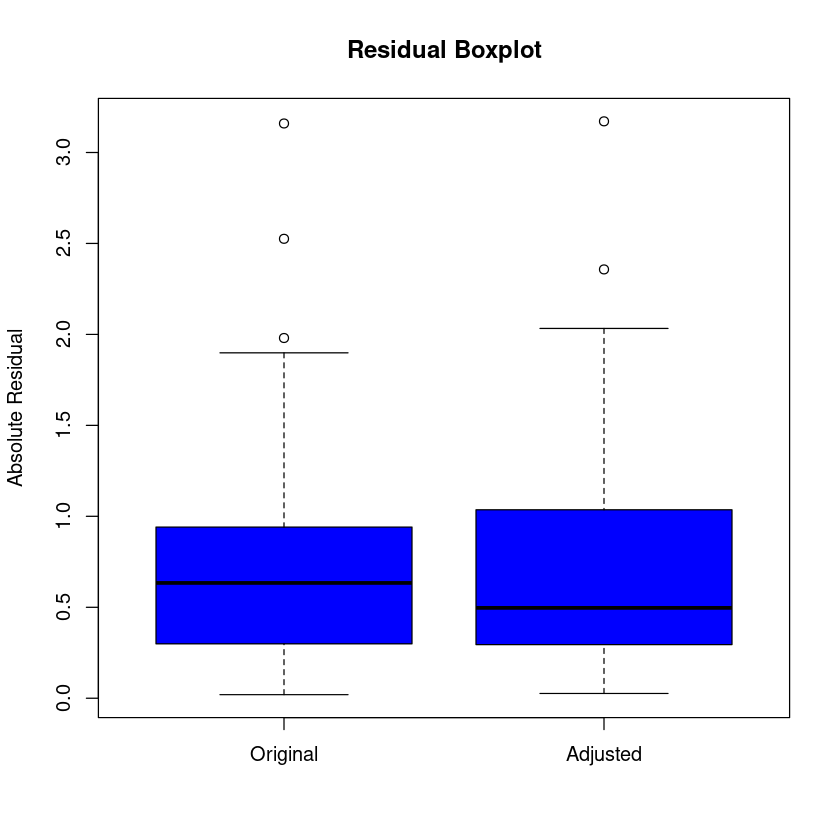

In [82]:
boxplot(cbind(abs(nlm_task4_res), abs(lm_task4_alt1_res)), main = "Residual Boxplot",
        names = c("Original", "Adjusted"), ylab = "Absolute Residual", col = "blue")


Again, after adding independent variables, the overall error seems to (slightly) drop in both the linear and the nonlinear case. However, the coefficient of determination $R^{2}$ increases significantly for the linear model. Now, approximately $10 \%$ of the variation in `Concentration` is predictable from the employed independent variables—instead of about $0.2 \%$, as previously observed.

## Résumé: What we realized about working with data

Data is not always nicely distributed and can be tricky to work with. Especially missing data and different definitions for the same term in different datasets can exacerbate the struggle. However, by investing enough time, you could gain some valuable insights.